In [2]:
import pandas
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','smart_location','number_of_reviews'])
ab_df['any_reviews']  = ab_df['number_of_reviews'].apply(lambda x: int(x!=0))
ab_df_reviewful = ab_df[ab_df['any_reviews'] == 1]
hosts = ab_df.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})
hosts_refver = ab_df_reviewful.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})

In [4]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv',usecols=['people_id','member_since','city','state','status','verified_status','references_int'])

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)
cs_df_defhosts = cs_df[cs_df['status'] == 'Accepting Guests']
cs_df_defhosts['any_verification'] = cs_df_defhosts['verified_status'].apply(lambda x: int(x != 'Not Verified'))
cs_df_defhosts['any_references'] = cs_df_defhosts['references_int'].apply(lambda x: int(x != 0))
cs_df_defhosts['any_ref_ver'] = cs_df_defhosts[['any_references','any_verification']].apply(lambda row: row[0] or row[1], axis=1)
cs_df_defhosts_refver = cs_df_defhosts[cs_df_defhosts['any_ref_ver'] == 1]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [5]:
unique(cs_df['status'].values)

array(['Accepting Guests', 'Maybe Accepting Guests',
       'Not Accepting Guests', 'Wants to Meet Up'], dtype=object)

In [6]:
hosts['host_since'] = hosts['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
hosts_refver['host_since'] = hosts_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)

In [7]:
ab_since_global = hosts.groupby(by='host_since').agg(len)
ab_since_global_refver = hosts_refver.groupby(by='host_since').agg(len)

In [8]:
ab_daily_roll = pandas.rolling_mean(ab_since_global, window=10)

(array([ 733408.,  733773.,  734138.,  734503.,  734869.,  735234.,
         735599.,  735964.]), <a list of 8 Text xticklabel objects>)

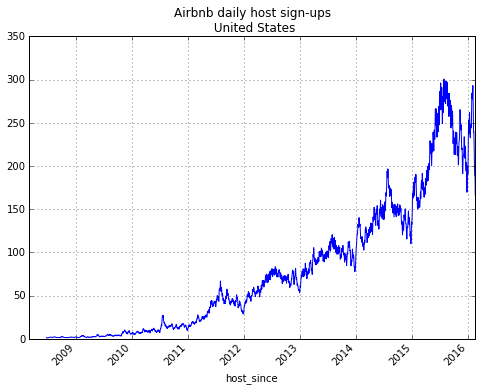

In [9]:
ax = ab_daily_roll.plot(legend=False, title='Airbnb daily host sign-ups \n United States', figsize=(8,6))
plt.xticks(rotation=45)

In [10]:
cs_since_global = cs_df.groupby(by='member_since').count()
cs_since_global_defhosts = cs_df_defhosts.groupby(by='member_since').count()
cs_since_global_defhosts_refver = cs_df_defhosts_refver.groupby(by='member_since').count()

In [11]:
cs_since_global

city  people_id   state  status  verified_status  \
member_since                                                       
2003-01-01        53         53      53      53               53   
2004-01-01      1396       1398    1398    1398             1398   
2005-01-01      6854       6856    6856    6856             6856   
2006-01-01     10307      10321   10321   10321            10321   
2007-01-01     23286      23307   23307   23307            23307   
2008-01-01     39086      39110   39110   39110            39110   
2009-01-01     47375      47427   47427   47427            47427   
2010-01-01     47326      47385   47385   47385            47385   
2011-01-01     36424      36491   36491   36491            36491   
2012-01-01    230716     230865  230865  230865           230865   
2013-01-01    306919     307045  307045  307045           307045   
2014-01-01    370380     371131  371131  371131           371131   
2015-01-01    258728     275593  275593  275593           275593   
2016-01-01     60427      65693   65693   65693            65693   

              references_int  
member_since                  
2003-01-01                53  
2004-01-01              1398  
2005-01-01              6856  
2006-01-01             10321  
2007-01-01             23307  
2008-01-01             39110  
2009-01-01             47427  
2010-01-01             47385  
2011-01-01             36491  
2012-01-01            230865  
2013-01-01            307045  
2014-01-01            371131  
2015-01-01            275593  
2016-01-01             65693

In [12]:
cs_since_global_defhosts

city  people_id  state  status  verified_status  \
member_since                                                     
2003-01-01       31         31     31      31               31   
2004-01-01      867        868    868     868              868   
2005-01-01     3835       3837   3837    3837             3837   
2006-01-01     6038       6046   6046    6046             6046   
2007-01-01    13958      13967  13967   13967            13967   
2008-01-01    23593      23604  23604   23604            23604   
2009-01-01    28885      28905  28905   28905            28905   
2010-01-01    29183      29206  29206   29206            29206   
2011-01-01    20815      20840  20840   20840            20840   
2012-01-01    14171      14206  14206   14206            14206   
2013-01-01    74462      74498  74498   74498            74498   
2014-01-01    19811      19876  19876   19876            19876   
2015-01-01    10564      10945  10945   10945            10945   
2016-01-01     2480       2614   2614    2614             2614   

              references_int  any_verification  any_references  any_ref_ver  
member_since                                                                 
2003-01-01                31                31              31           31  
2004-01-01               868               868             868          868  
2005-01-01              3837              3837            3837         3837  
2006-01-01              6046              6046            6046         6046  
2007-01-01             13967             13967           13967        13967  
2008-01-01             23604             23604           23604        23604  
2009-01-01             28905             28905           28905        28905  
2010-01-01             29206             29206           29206        29206  
2011-01-01             20840             20840           20840        20840  
2012-01-01             14206             14206           14206        14206  
2013-01-01             74498             74498           74498        74498  
2014-01-01             19876             19876           19876        19876  
2015-01-01             10945             10945           10945        10945  
2016-01-01              2614              2614            2614         2614

In [13]:
cs_since_global_defhosts_refver

city  people_id  state  status  verified_status  references_int  \
member_since                                                                    
2003-01-01      10         10     10      10               10              10   
2004-01-01     142        142    142     142              142             142   
2005-01-01     681        682    682     682              682             682   
2006-01-01    1619       1626   1626    1626             1626            1626   
2007-01-01    4124       4131   4131    4131             4131            4131   
2008-01-01    6669       6679   6679    6679             6679            6679   
2009-01-01    7630       7646   7646    7646             7646            7646   
2010-01-01    7872       7887   7887    7887             7887            7887   
2011-01-01    6777       6796   6796    6796             6796            6796   
2012-01-01    5747       5769   5769    5769             5769            5769   
2013-01-01    5097       5111   5111    5111             5111            5111   
2014-01-01    3919       3942   3942    3942             3942            3942   
2015-01-01    3192       3281   3281    3281             3281            3281   
2016-01-01     539        556    556     556              556             556   

              any_verification  any_references  any_ref_ver  
member_since                                                 
2003-01-01                  10              10           10  
2004-01-01                 142             142          142  
2005-01-01                 682             682          682  
2006-01-01                1626            1626         1626  
2007-01-01                4131            4131         4131  
2008-01-01                6679            6679         6679  
2009-01-01                7646            7646         7646  
2010-01-01                7887            7887         7887  
2011-01-01                6796            6796         6796  
2012-01-01                5769            5769         5769  
2013-01-01                5111            5111         5111  
2014-01-01                3942            3942         3942  
2015-01-01                3281            3281         3281  
2016-01-01                 556             556          556

# Average 2013

In [14]:
cs_since_global_2013mean = cs_since_global_defhosts.copy()

In [15]:
cs_since_global_2013mean.ix['2013-01-01'] = (cs_since_global_2013mean.ix['2012-01-01'] + cs_since_global_2013mean.ix['2014-01-01']) / 2

In [16]:
cs_year_roll = pandas.rolling_mean(cs_since_global['people_id'], window=2)
cs_year_roll_defhosts = pandas.rolling_mean(cs_since_global_defhosts['people_id'], window=2)



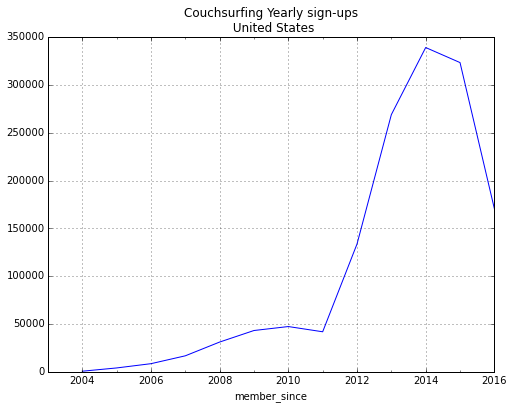

In [17]:
cs_year_roll.plot(title="Couchsurfing Yearly sign-ups\n United States", figsize=(8,6))

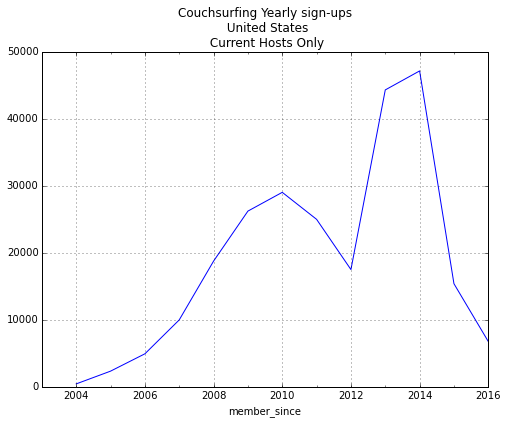

In [18]:
cs_year_roll_defhosts.plot(title="Couchsurfing Yearly sign-ups\n United States\n Current Hosts Only", figsize=(8,6))

In [19]:
ab_since_year = ab_since_global.groupby(by=lambda x: x.year).agg(sum)
ab_since_year_refver = ab_since_global_refver.groupby(by=lambda x: x.year).agg(sum)
cs_since_year = pandas.DataFrame(cs_since_global.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts = pandas.DataFrame(cs_since_global_defhosts.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_2013mean = pandas.DataFrame(cs_since_global_2013mean.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts_refver = pandas.DataFrame(cs_since_global_defhosts_refver.groupby(by=lambda x: x.year).agg(sum)['people_id'])

In [20]:
ab_since_year.columns = ['signups']
ab_since_year_refver.columns = ['signups']
cs_since_year.columns = ['signups']
cs_since_year_defhosts.columns = ['signups']
cs_since_year_2013mean.columns = ['signups']
cs_since_year_defhosts_refver.columns = ['signups']

In [21]:
abcs = ab_since_year.join(cs_since_year,how='outer',lsuffix='_ab', rsuffix='_cs')
abcs_all= abcs.join(cs_since_year_defhosts, rsuffix='_cs_definitehosts')
abcs_defhost = ab_since_year.join(cs_since_year_defhosts,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts')
abcs_2013mean = ab_since_year.join(cs_since_year_2013mean,how='outer',lsuffix="_ab", rsuffix='_cs_2013mean')
abcs_defhost_refver = ab_since_year.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')
abcs_both_refver = ab_since_year_refver.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')

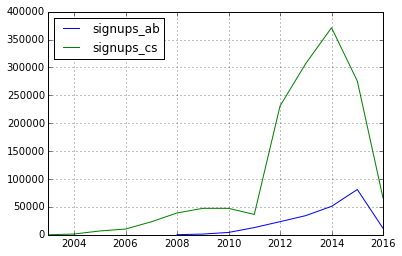

In [22]:
abcs.plot()

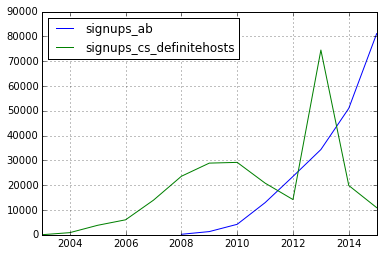

In [23]:
abcs_defhost.ix[:2015].plot()

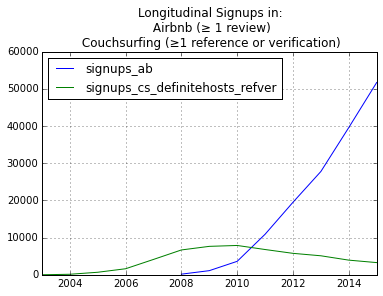

In [24]:
abcs_both_refver.ix[:2015].plot(title='Longitudinal Signups in:\n Airbnb (≥ 1 review)\n Couchsurfing (≥1 reference or verification)')

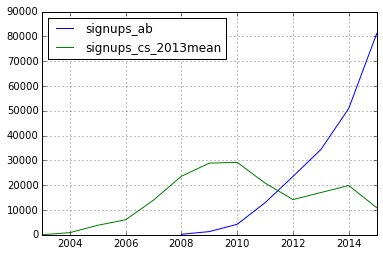

In [25]:
abcs_2013mean.ix[:2015].plot()

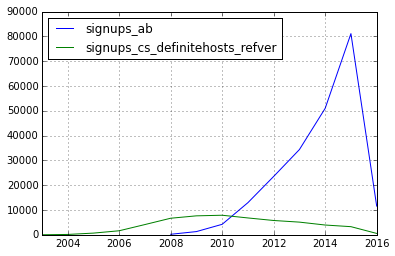

In [26]:
abcs_defhost_refver.plot()

In [27]:
abcs_both_refver.fillna(0, inplace=True)

signups - defintiely host, signups_cs - includes maybe accepting. No 2013 adjustment

In [28]:
abcs_all.corr()

signups_ab  signups_cs   signups
signups_ab    1.000000    0.814058 -0.053600
signups_cs    0.814058    1.000000  0.478641
signups      -0.053600    0.478641  1.000000

In [29]:
abcs_2013mean.ix[2008:2015].corr()

signups_ab  signups_cs_2013mean
signups_ab             1.000000            -0.797019
signups_cs_2013mean   -0.797019             1.000000

In [30]:
abcs_defhost_refver.ix[2008:2015].corr()

signups_ab  signups_cs_definitehosts_refver
signups_ab                         1.000000                        -0.950764
signups_cs_definitehosts_refver   -0.950764                         1.000000

In [31]:
abcs_both_refver.corr()

signups_ab  signups_cs_definitehosts_refver
signups_ab                         1.000000                         0.134996
signups_cs_definitehosts_refver    0.134996                         1.000000

In [32]:
abcs_both_refver.ix[2008:2015]

signups_ab  signups_cs_definitehosts_refver
2008         173                             6679
2009        1114                             7646
2010        3621                             7887
2011       10898                             6796
2012       19499                             5769
2013       27776                             5111
2014       39586                             3942
2015       51692                             3281

BY CITY
========

In [34]:
state_dict = dict( (('Alabama', 'AL'),
       ('Alaska', 'AK'),
       ('Arizona', 'AZ'),
       ('Arkansas', 'AR'),
       ('California', 'CA'),
       ('Colorado', 'CO'),
       ('Connecticut', 'CT'),
       ('Delaware', 'DE'),
       ('District of Columbia', 'DC'),
       ('Florida', 'FL'),
       ('Georgia', 'GA'),
       ('Hawaii', 'HI'),
       ('Idaho', 'ID'),
       ('Illinois', 'IL'),
       ('Indiana', 'IN'),
       ('Iowa', 'IA'),
       ('Kansas', 'KS'),
       ('Kentucky', 'KY'),
       ('Louisiana', 'LA'),
       ('Maine', 'ME'),
       ('Maryland', 'MD'),
       ('Massachusetts', 'MA'),
       ('Michigan', 'MI'),
       ('Minnesota', 'MN'),
       ('Mississippi', 'MS'),
       ('Missouri', 'MO'),
       ('Montana', 'MT'),
       ('Nebraska', 'NE'),
       ('Nevada', 'NV'),
       ('New Hampshire', 'NH'),
       ('New Jersey', 'NJ'),
       ('New Mexico', 'NM'),
       ('New York', 'NY'),
       ('North Carolina', 'NC'),
       ('North Dakota', 'ND'),
       ('Ohio', 'OH'),
       ('Oklahoma', 'OK'),
       ('Oregon', 'OR'),
       ('Pennsylvania', 'PA'),
       ('Rhode Island', 'RI'),
       ('South Carolina', 'SC'),
       ('South Dakota', 'SD'),
       ('Tennessee', 'TN'),
       ('Texas', 'TX'),
       ('Utah', 'UT'),
       ('Vermont', 'VT'),
       ('Virginia', 'VA'),
       ('Washington', 'WA'),
       ('West Virginia', 'WV'),
       ('Wisconsin', 'WI'),
       ('Wyoming', 'WY')) )

def state_lookup(s):

    if len(s) ==2:
        return s.lower()
    else:
        try:
            return state_dict[s].lower()
        except KeyError:
            print(s)
            return float('nan')

In [35]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439277

In [36]:
print(len(cs_df_defhosts_refver))
cs_df_defhosts_refver.dropna(inplace=True)
print(len(cs_df_defhosts_refver))

54258
54018


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
cs_df.head()

city member_since               people_id    state  \
0      Wadley   2009-01-01  /people/stopsmoking384       AL   
1  Adamsville   2013-01-01   /people/randolphposey       AL   
2  Graysville   2012-01-01           /people/bart4       AL   
3   Abbeville   2012-01-01    /people/benia.acoose  Alabama   
4   Abbeville   2009-01-01       /people/krsmrsh14  Alabama   

                   status verified_status  references_int  
0        Accepting Guests    Not Verified               0  
1        Accepting Guests    Not Verified               0  
2  Maybe Accepting Guests    Not Verified               0  
3  Maybe Accepting Guests    Not Verified               0  
4        Accepting Guests    Not Verified               0

In [38]:
cs_df['state'] = cs_df['state'].map(state_lookup)
cs_df['city'] = cs_df['city'].apply(lambda x: x.strip().lower())
cs_df.dropna(inplace=True)
cs_df['state'] = cs_df['state'].apply(lambda x: x.strip().lower())
cs_df['citystate'] = cs_df['city'] + '_' + cs_df['state']
cs_df['year'] = cs_df['member_since'].apply(lambda x: x.year)

Attica
Littoral
Taiwan
Colorado

Tasman
Iran
Milwaukee
Minas Gerais


In [39]:
cs_df_defhosts_refver['city']

147       Pelham
158    Alabaster
220       Pelham
381       Oxford
399    Andalusia
409    Andalusia
430         Arab
484     Ashville
487       Athens
851       Auburn
928       Auburn
929       Auburn
930       Auburn
931       Auburn
933       Auburn
...
1462644             Houston
1462646             Madison
1462649            Sarasota
1462650             Atlanta
1462652         Los Angeles
1462653             Seattle
1462654           Fairbanks
1462655         Little Rock
1462659               Fargo
1462664         Chapel Hill
1462665            New York
1462668            New York
1462669            New York
1462670    Livingston Manor
1462672            New York
Name: city, Length: 54018, dtype: object

In [40]:
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].map(state_lookup)
cs_df_defhosts_refver['city'] = cs_df_defhosts_refver['city'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['citystate'] = cs_df_defhosts_refver['city'] + '_' + cs_df_defhosts_refver['state']
cs_df_defhosts_refver['year'] = cs_df_defhosts_refver['member_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [41]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [42]:
cs_df_all = cs_df[['citystate','year','people_id']]
cs_df_definite = cs_df[cs_df['status'] == 'Accepting Guests'][['citystate','year','people_id']]

In [43]:
cs_citystate = cs_df_definite.groupby(by=['citystate','year']).agg(len)

In [44]:
len(cs_df_defhosts_refver)

54018

In [45]:
cs_df_defhosts_refver.to_csv('cleaned csv/cs_defhosts_refver.csv',columns=['people_id','year','citystate'])

In [46]:
cs_df_defhosts_refver_selectcol = cs_df_defhosts_refver[['citystate','year','people_id']]
cs_citystate_refver = cs_df_defhosts_refver_selectcol.groupby(by=['citystate','year']).agg(len)

In [47]:
cs_citystate_refver.columns = ['signups']

# Average out the 2013 anomaly

In [48]:
cs_citystate.columns = ['signups']

In [49]:
cs_citystate.unstack()['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    74461
2014    19811
2015    10563
2016     2480
dtype: float64

In [50]:
cs_citystate_unstacked = cs_citystate.unstack()
cs_citystate_unstacked.fillna(0, inplace=True)
mean2013 = (cs_citystate_unstacked['signups'][2012] +  cs_citystate_unstacked['signups'][2014]) /2

In [51]:
mean2013.sum()

16991.0

In [52]:
cs_citystate_2013mean = cs_citystate_unstacked.copy()

In [53]:
cs_citystate_2013mean.columns

MultiIndex(levels=[['signups'], [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=[None, 'year'])

In [54]:
cs_citystate_2013mean.loc[:,('signups',2013)] = mean2013

In [55]:
cs_citystate_2013mean['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    16991
2014    19811
2015    10563
2016     2480
dtype: float64

In [56]:
ab_loc = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','city','state','number_of_reviews'])
hosts_loc = ab_df.groupby(by='host_id',as_index=True).agg(min)

ab_refver = ab_loc[ab_loc['number_of_reviews']>=1]


In [57]:
print(len(ab_loc))
ab_loc.dropna(inplace=True)
print(len(ab_loc))

print(len(ab_refver))
ab_refver.dropna(inplace=True)
print(len(ab_refver))

337213
336140
224161
223540


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
ab_loc['city'] = ab_loc['city'].apply(lambda x: x.strip().lower())
ab_loc['state'] = ab_loc['state'].apply(lambda x: x.strip().lower())
ab_loc['citystate'] = ab_loc['city'] + '_' + ab_loc['state']
ab_loc['host_since'] = ab_loc['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_loc['year'] = ab_loc['host_since'].apply(lambda x: x.year)

In [59]:
ab_refver['city'] = ab_refver['city'].apply(lambda x: x.strip().lower())
ab_refver['state'] = ab_refver['state'].apply(lambda x: x.strip().lower())
ab_refver['citystate'] = ab_refver['city'] + '_' + ab_refver['state']
ab_refver = ab_refver[(ab_refver['city'] != ab_refver['state']) & (ab_refver['state'] != 'puerto rico')]# notpuerto rico
ab_refver['host_since'] = ab_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_refver['year'] = ab_refver['host_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [60]:
ab_refver.to_csv('cleaned csv/ab_hosts_refver.csv')

In [61]:
ab_loc = ab_loc[['citystate','year','host_id']]
ab_citystate = ab_loc.groupby(by=['citystate','year']).agg(len)

ab_refver = ab_refver[['citystate','year','host_id']]
ab_citystate_refver = ab_refver.groupby(by=['citystate','year']).agg(len)

In [62]:
ab_citystate.columns = ['signups']
ab_citystate_refver.columns = ['signups']

In [63]:
abcs_citystate = pandas.merge(cs_citystate, ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_2013mean = pandas.merge(cs_citystate_2013mean.stack(), ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_refver = pandas.merge(cs_citystate_refver, ab_citystate_refver, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))


In [64]:
abcs_citystate.head()

signups_cs  signups_ab
citystate                        year                        
(surfside beach) myrtle beach_sc 2015         NaN           1
12814_ny                         2015         NaN           1
2_ny                             2015         NaN           1
4_la                             2011         NaN           1
abbeville_al                     2007           1         NaN

In [65]:
abcs_citystate.fillna(0, inplace=True)
abcs_citystate_2013mean.fillna(0, inplace=True)
abcs_citystate_refver.fillna(0, inplace=True)

In [66]:
cs_cum = abcs_citystate.unstack()['signups_cs'].sum(axis=1)
cs_cum_2013mean = abcs_citystate_2013mean.unstack()['signups_cs'].sum(axis=1)
ab_cum = abcs_citystate.unstack()['signups_ab'].sum(axis=1)

cs_cum_refver = abcs_citystate_refver.unstack()['signups_cs'].sum(axis=1)
ab_cum_refver = abcs_citystate_refver.unstack()['signups_ab'].sum(axis=1)

In [67]:
abcs_cum_refver = pandas.DataFrame.from_records([cs_cum_refver,ab_cum_refver]).T
abcs_cum_refver.columns = ['signups_cs','signups_ab']

In [68]:
abcs_cum_refver['citystate_matched'] = abcs_cum_refver.all(axis=1)

In [69]:
len(abcs_cum_refver[abcs_cum_refver['citystate_matched']==True])

4606

In [70]:
abcs_cum_refver[abcs_cum_refver['citystate_matched']==False].sort('signups_cs', ascending=False)

signups_cs  signups_ab citystate_matched
citystate                                                              
winston salem_nc                       34           0             False
bowling green_oh                       28           0             False
murray_ky                              17           0             False
edwardsville_il                        13           0             False
lees summit_mo                         10           0             False
allendale_mi                           10           0             False
meadville_pa                            9           0             False
chevy chase village_md                  8           0             False
hilliard_oh                             8           0             False
garner_nc                               7           0             False
fergus falls_mn                         7           0             False
purchase_ny                             7           0             False
o fallon_mo                             7           0             False
grinnell_ia                             7           0             False
delta junction_ak                       6           0             False
dearborn heights_mi                     6           0             False
bartlesville_ok                         6           0             False
auburn hills_mi                         6           0             False
poultney_vt                             6           0             False
grand canyon village_az                 6           0             False
longview_tx                             6           0             False
etna_ca                                 6           0             False
centralia_wa                            6           0             False
elk grove village_il                    5           0             False
new haven_in                            5           0             False
marion_in                               5           0             False
west chester_oh                         5           0             False
sherman_tx                              5           0             False
lake jackson_tx                         5           0             False
portales_nm                             5           0             False
...                                   ...         ...               ...
heiskell_tn                             0           2             False
hever-overgaard_az                      0           1             False
hibbing_mn                              0           1             False
hillsboro beach_fl                      0           5             False
highland mills_ny                       0           2             False
hillcrest heights_md                    0           2             False
hilham_tn                               0           1             False
hiles_wi                                0           1             False
highlands_nj                            0           8             False
highlands_nc                            0          10             False
highlands ranch_co                      0           8             False
highland_wi                             0           1             False
highland_md                             0           1             False
highland village_tx                     0           1             False
highland park, los angeles_ca           0           2             False
highland park, detroit_mi               0           1             False
highland lakes_nj                       0           1             False
hickman_tn                              0           1             False
highland lake_ny                        0           1             False
highland heights_oh                     0           1             False
highland falls_ny                       0           7             False
high springs_fl                         0           4             False
high falls_ny                           0          32             False

In [71]:
'east' in abcs_cum_refver[abcs_cum_refver['signups_cs'] > 1].index

False

In [72]:
abcs_cum_refver['signups_ab'].sum()

221705.0

In [73]:
print('all the hosts')
ah = abcs_cum_refver.sum().sum()
print(ah)
print('all the hosts in cities that dont cross site match')
um = abcs_cum_refver[abcs_cum_refver['citystate_matched']==False].sum().sum()
print(um)
print('percent remaining after matching')
print((ah-um) / ah)

all the hosts
280329.0
all the hosts in cities that dont cross site match
26763.0
percent remaining after matching
0.904530034352


In [74]:
dual_min = 100
big_cities = abcs_citystate.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities = abcs_citystate.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]
big_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]

In [75]:
dual_min_refver = 1
big_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver >=dual_min_refver].ix[cs_cum_refver >=dual_min_refver]
small_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver <dual_min_refver].ix[cs_cum_refver <dual_min_refver]

# City Size in General, Correlations

In [76]:
big_cities.stack().corr()

signups_cs  signups_ab
signups_cs    1.000000    0.483983
signups_ab    0.483983    1.000000

In [77]:
small_cities.stack().corr()

signups_cs  signups_ab
signups_cs    1.000000   -0.028088
signups_ab   -0.028088    1.000000

In [78]:
big_cities_2013mean.stack().corr()

signups_cs  signups_ab
signups_cs    1.000000    0.480205
signups_ab    0.480205    1.000000

In [79]:
small_cities_2013mean.stack().corr()

signups_cs  signups_ab
signups_cs    1.000000    0.111111
signups_ab    0.111111    1.000000

In [80]:
big_cities_refver.stack().corr()

signups_cs  signups_ab
signups_cs    1.000000    0.495994
signups_ab    0.495994    1.000000

In [81]:
small_cities_refver.stack().corr()

signups_cs  signups_ab
signups_cs         NaN         NaN
signups_ab         NaN         NaN

# City Size Graphs 2013-spikey

# Top and Bottom 10 Cities by Host Signup Correlation
astoria_ny -0.506767846293
bronx_ny -0.43575505253
brooklyn_ny -0.279579570201
kirkland_wa -0.236943453306
henderson_nv -0.215818449024
decatur_ga -0.199389573153
saint augustine_fl -0.175538761362
missoula_mt -0.171321563498
mesa_az -0.166079694788
fremont_ca -0.136153752448
sarasota_fl -0.118963157211
aurora_co -0.111809655992
boca raton_fl -0.0956549577791
pensacola_fl -0.084540920962
encinitas_ca -0.0752002624336
san francisco_ca 0.433394645969
clearwater_fl 0.443348336762
alameda_ca 0.466479287199
new york_ny 0.475645375815
mountain view_ca 0.476090142653
west hollywood_ca 0.482007996392
durham_nc 0.513706009202
santa barbara_ca 0.517287284157
palo alto_ca 0.518319888303
berkeley_ca 0.547624972876
miami beach_fl 0.549096473116
savannah_ga 0.626666477869
santa monica_ca 0.672967338518
lafayette_la 0.674851852554
washington_dc 0.802517705277
# Top and Bottom 10 Cities by AB size
new york_ny 10510.0
brooklyn_ny 1742.0
los angeles_

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


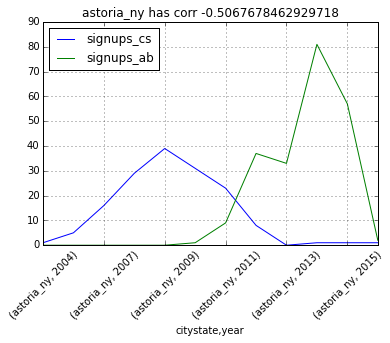

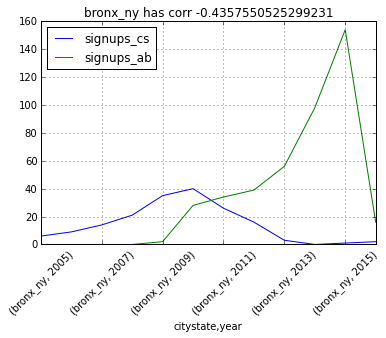

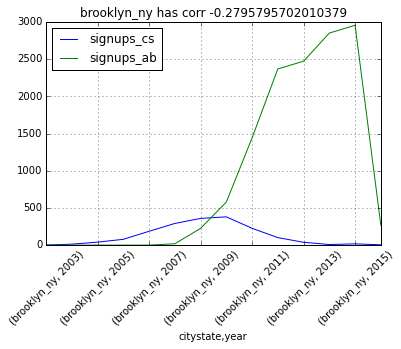

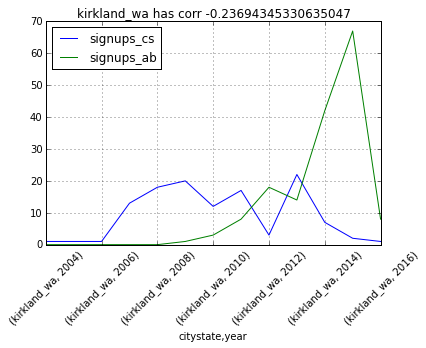

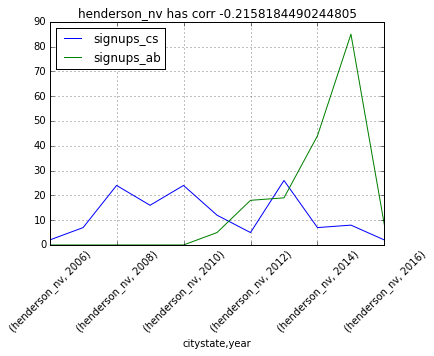

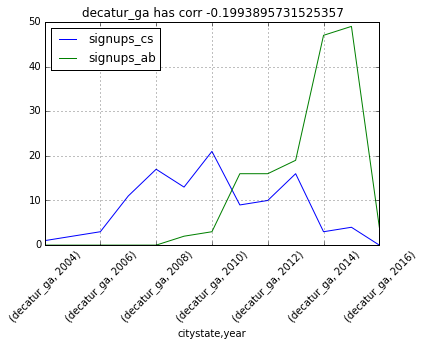

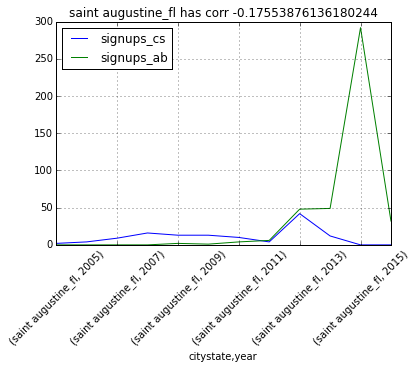

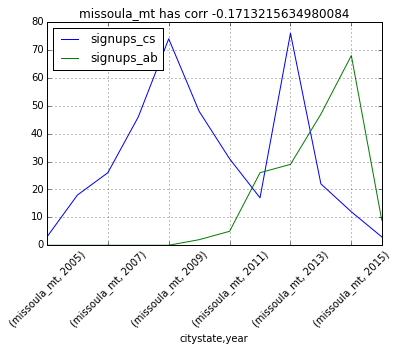

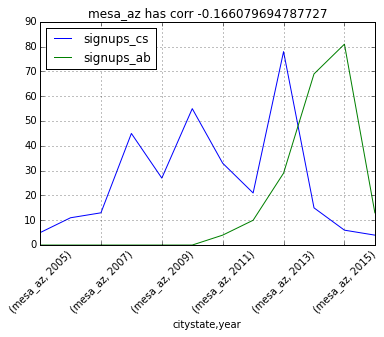

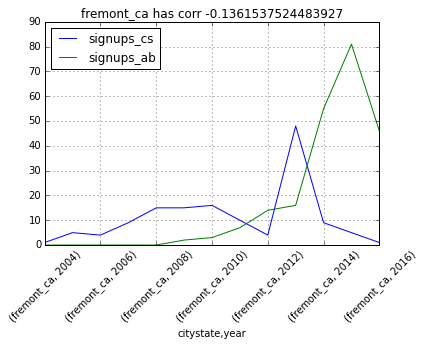

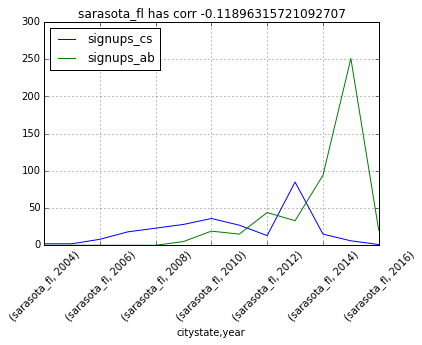

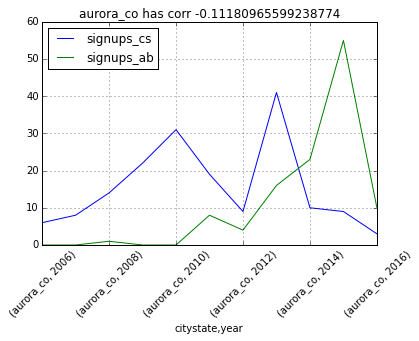

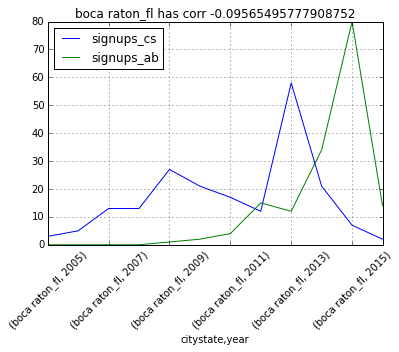

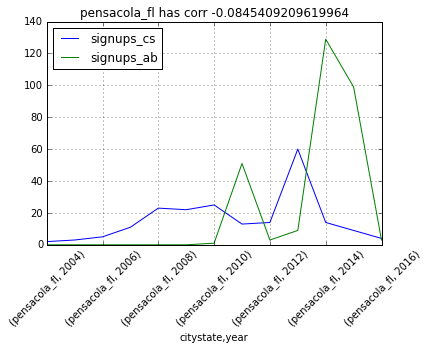

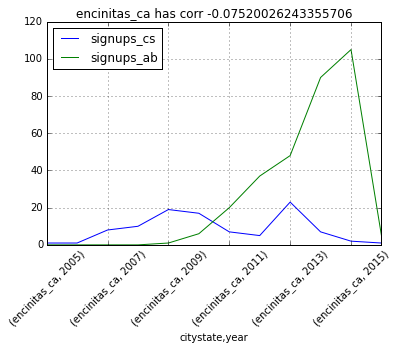

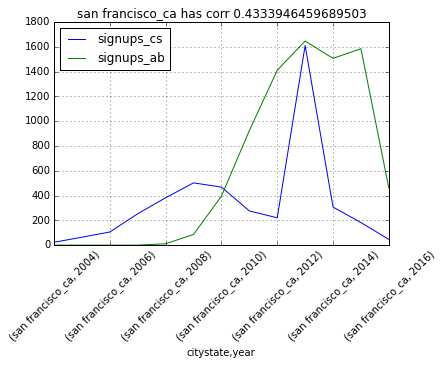

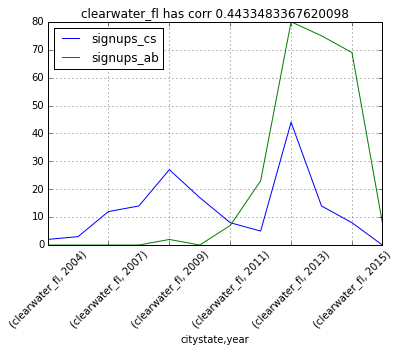

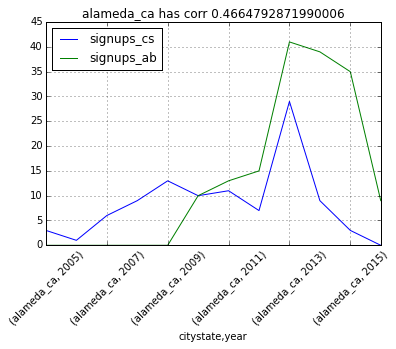

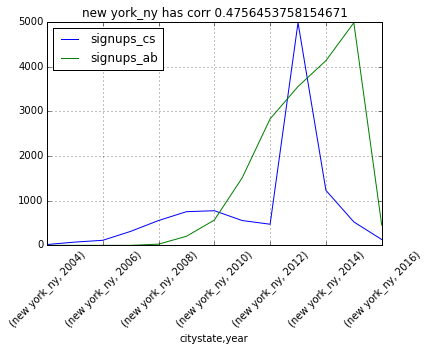

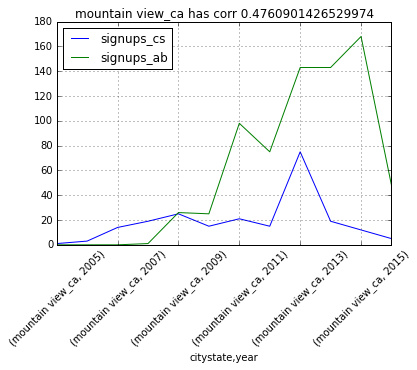

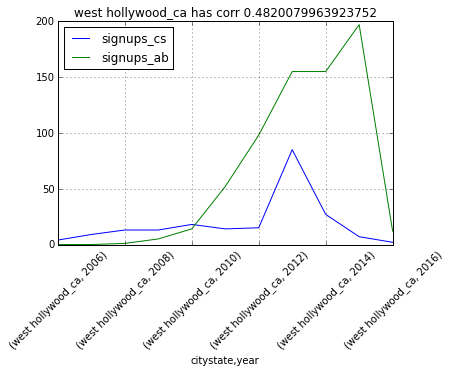

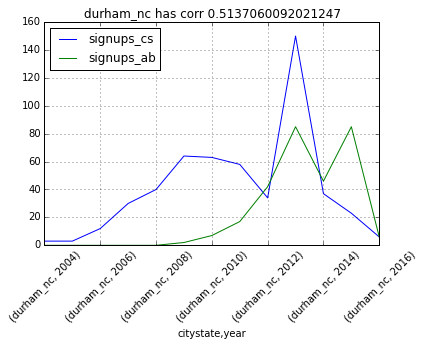

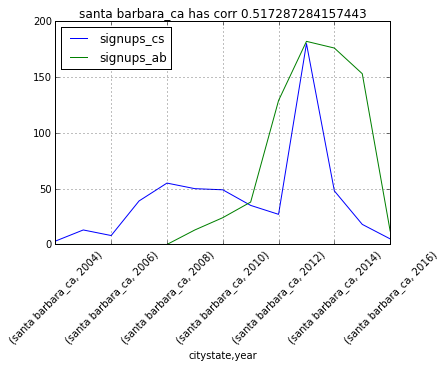

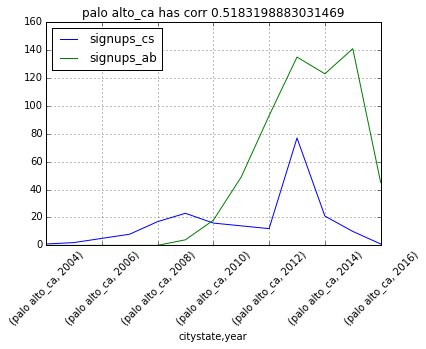

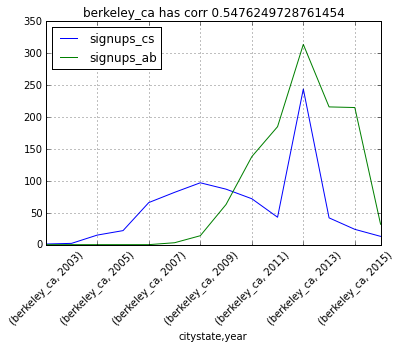

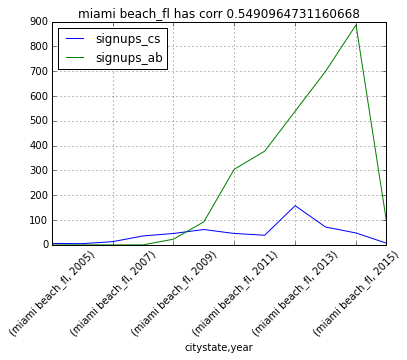

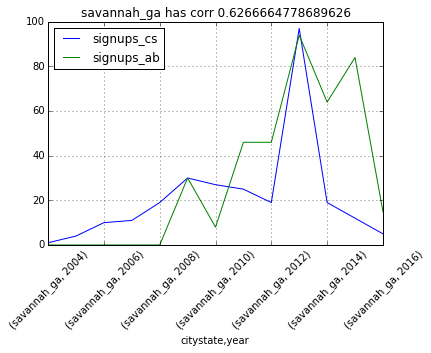

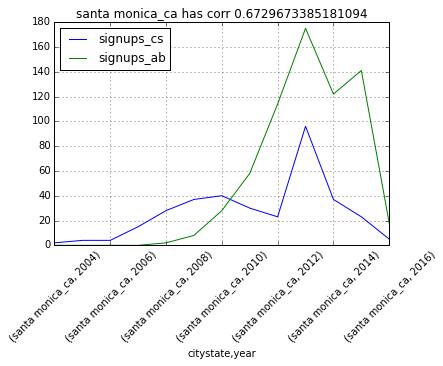

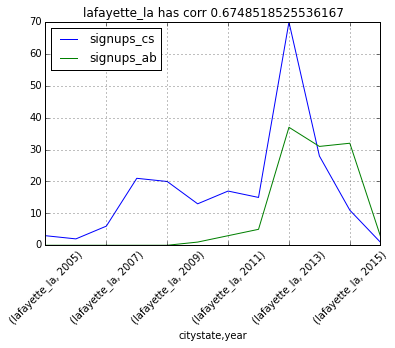

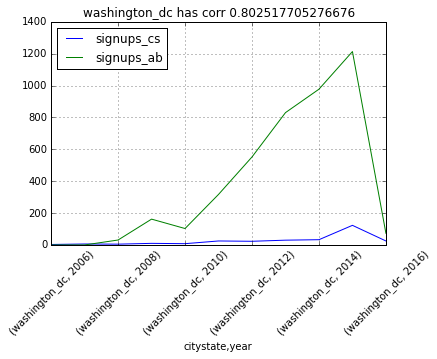

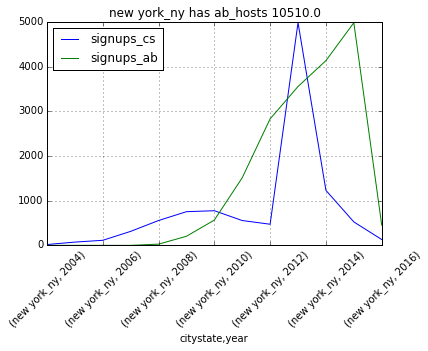

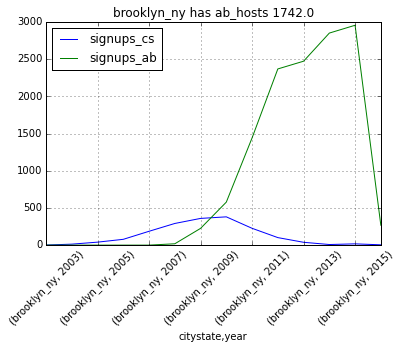

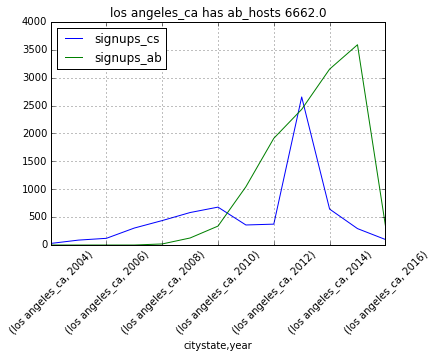

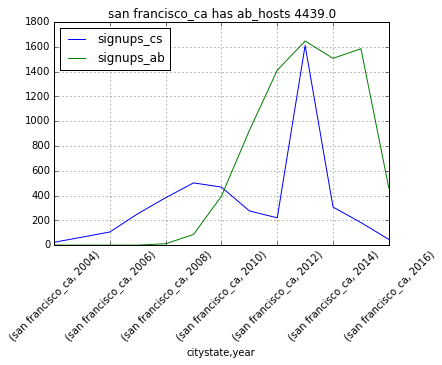

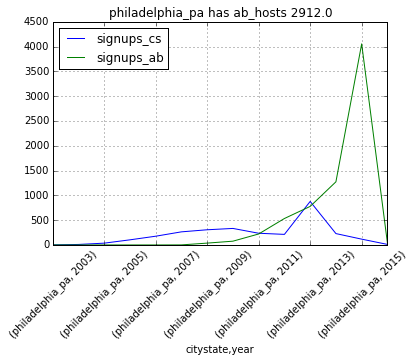

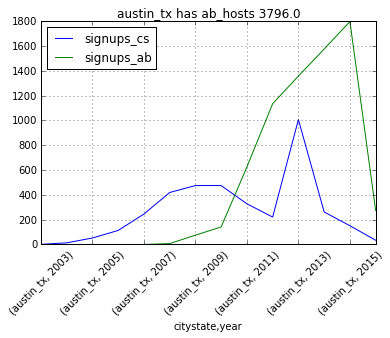

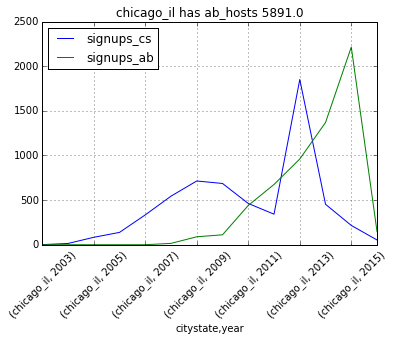

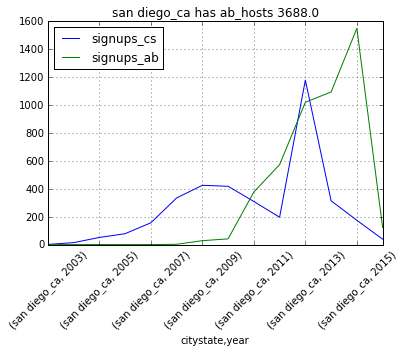

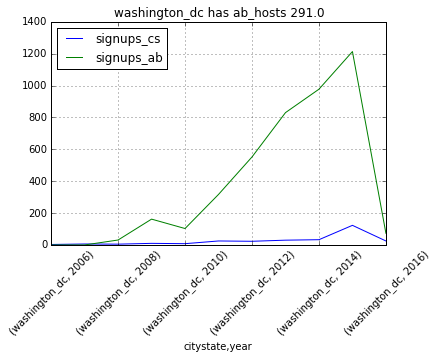

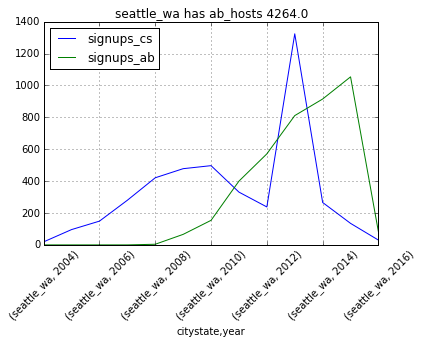

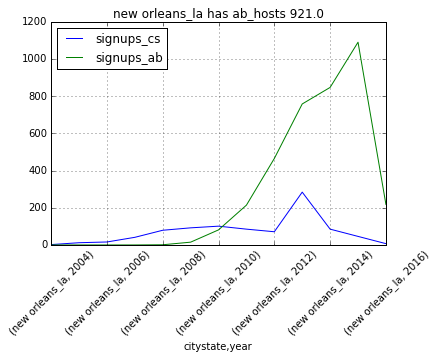

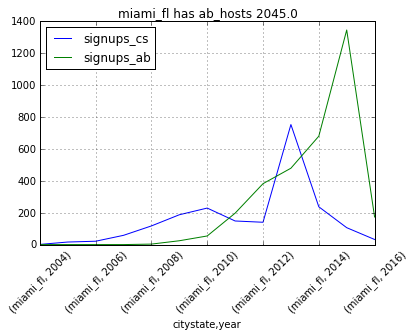

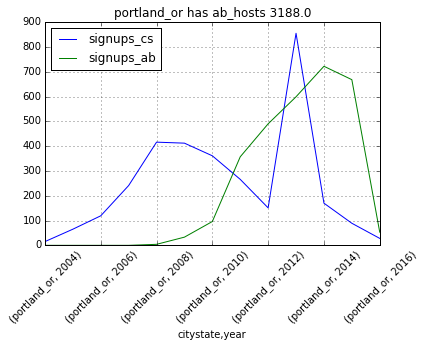

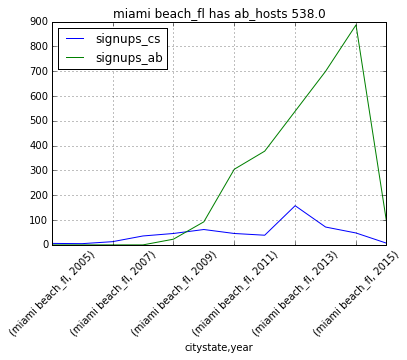

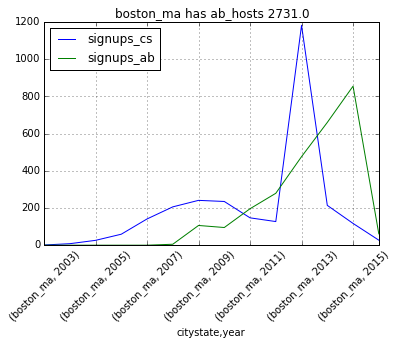

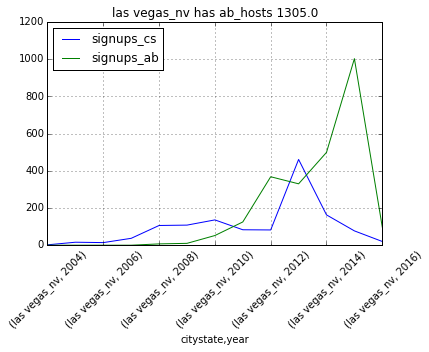

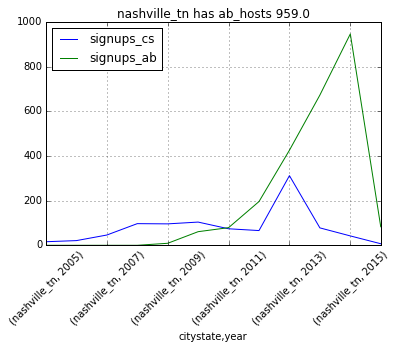

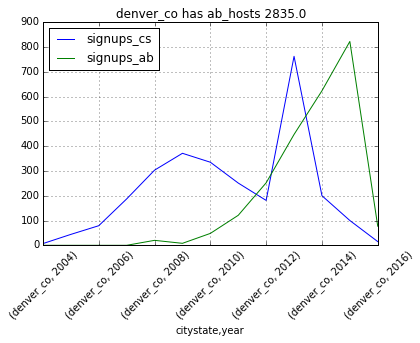

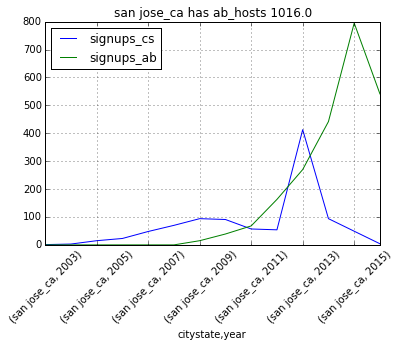

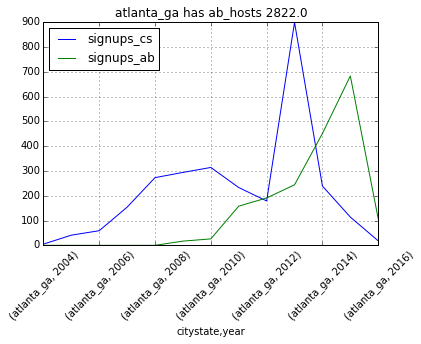

In [82]:
big_cities_groups = big_cities.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# City Size, with 2013 mean adjusted

In [83]:
big_cities_corr_refver.ix['minneapolis_mn']

signup_abcs_correlation    0.224269
Name: minneapolis_mn, dtype: float64

# Top and Bottom 10 Cities by Host Signup Correlation
astoria_ny -0.364107865481
saint augustine_fl -0.303149260148
brooklyn_ny -0.269244128978
bronx_ny -0.264384441426
kirkland_wa -0.219428580846
mesa_az -0.219215313176
saint paul_mn -0.216181239653
fremont_ca -0.197336542205
missoula_mt -0.18691885262
decatur_ga -0.18309414405
redmond_wa -0.164192066597
anchorage_ak -0.152963765834
bozeman_mt -0.146744075458
eugene_or -0.142658297903
sarasota_fl -0.142544711873
honolulu_hi 0.358077085692
palo alto_ca 0.369990038288
chattanooga_tn 0.385215185688
las vegas_nv 0.386258456862
savannah_ga 0.394036353337
los angeles_ca 0.407625478893
mountain view_ca 0.439754175054
detroit_mi 0.456108965722
myrtle beach_sc 0.465062838633
santa monica_ca 0.481056269234
lafayette_la 0.525119059271
west hollywood_ca 0.551041349967
new york_ny 0.615211736253
miami beach_fl 0.666030111452
washington_dc 0.824400838559
# Top and Bottom 10 Cities by AB size
new york_ny 6372.5
brooklyn_ny 1758.5
los angeles_ca 4518

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


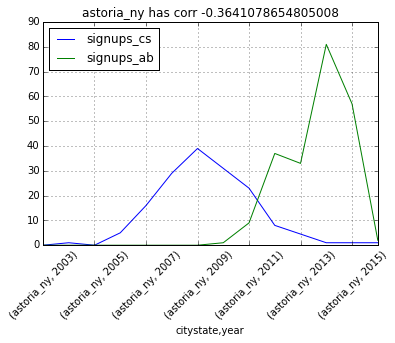

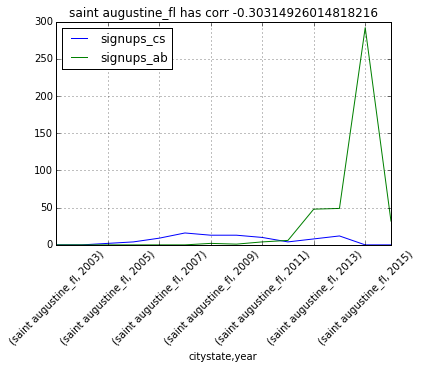

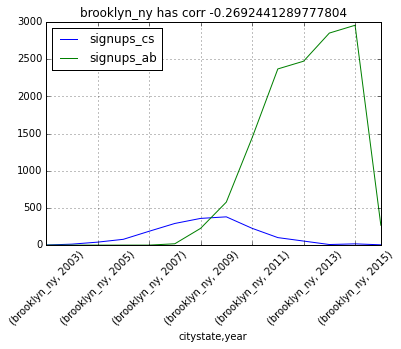

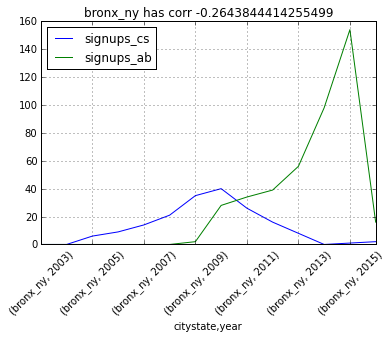

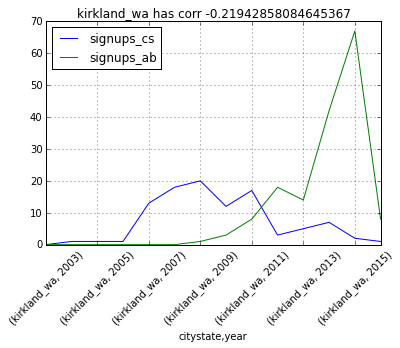

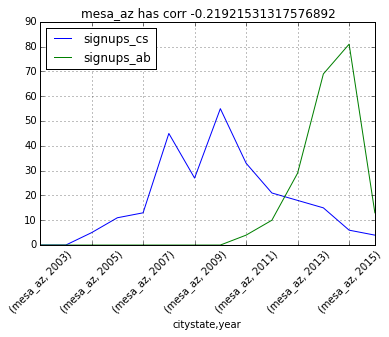

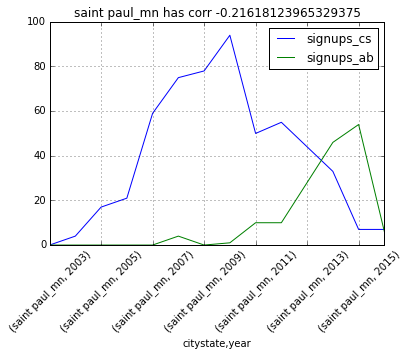

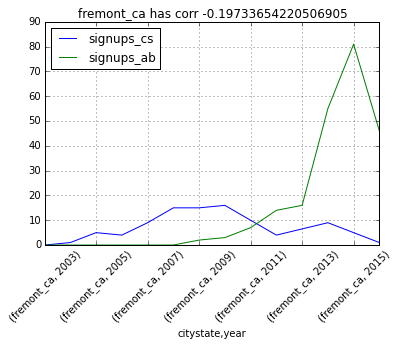

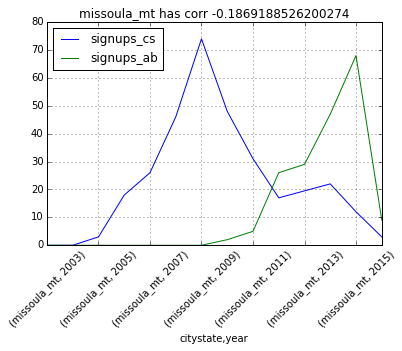

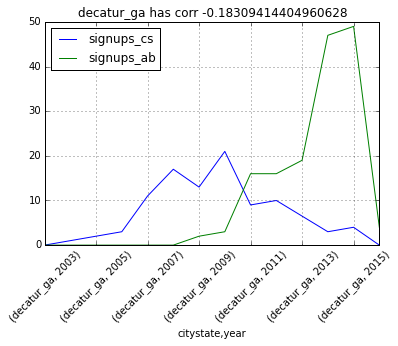

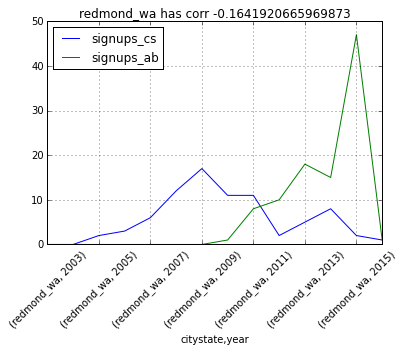

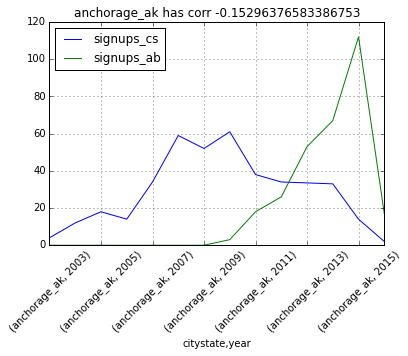

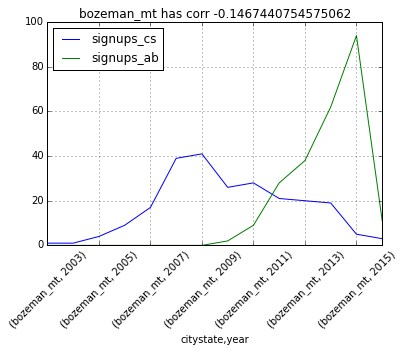

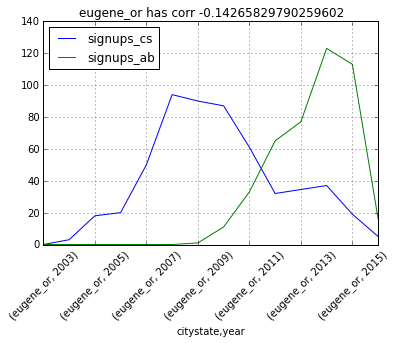

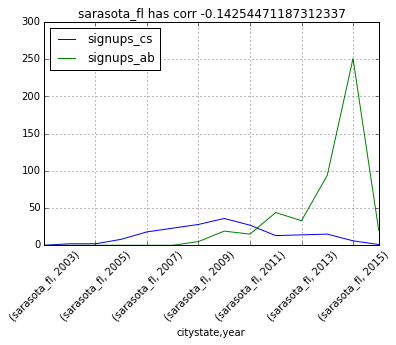

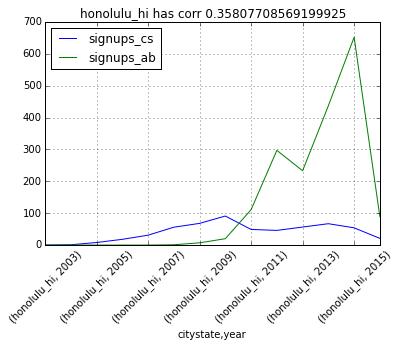

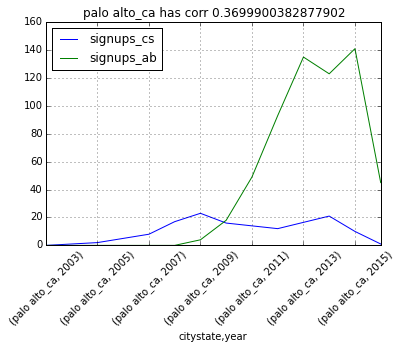

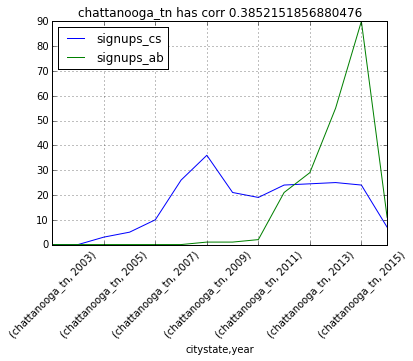

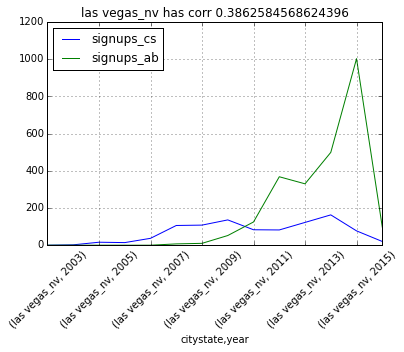

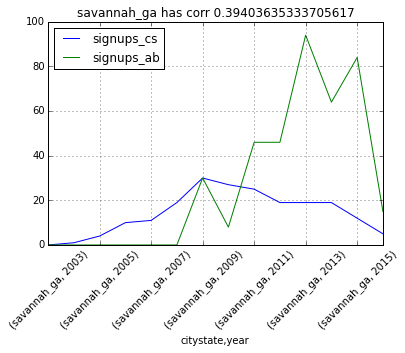

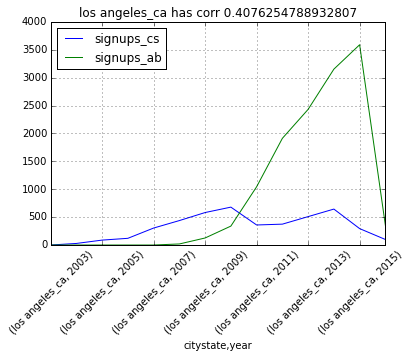

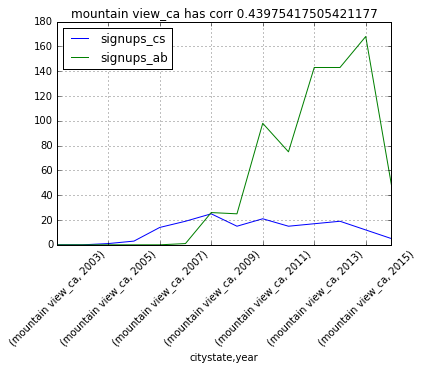

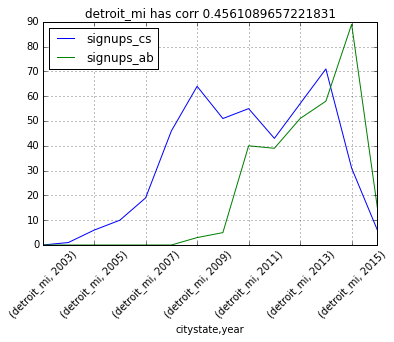

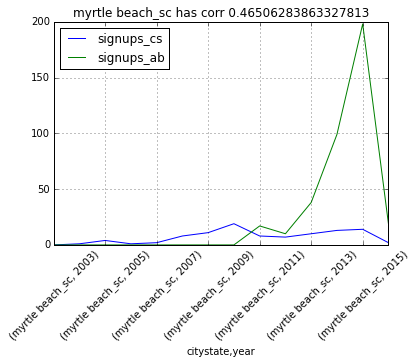

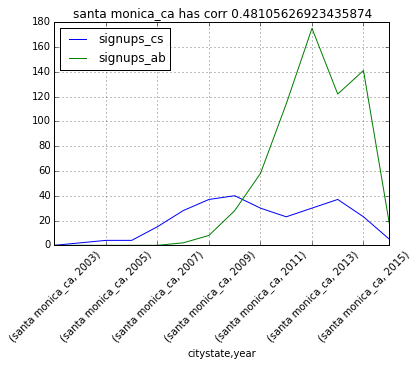

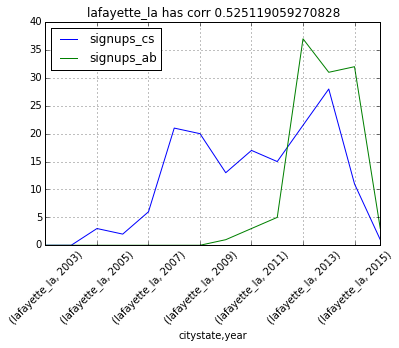

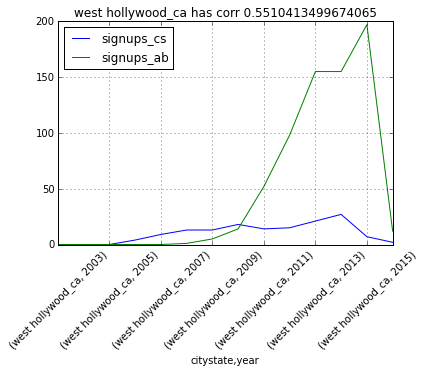

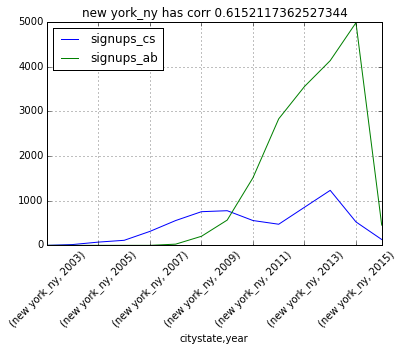

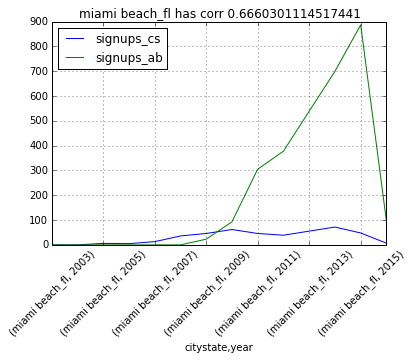

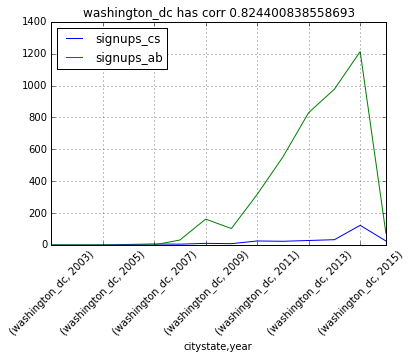

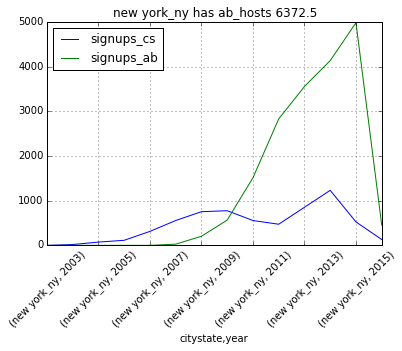

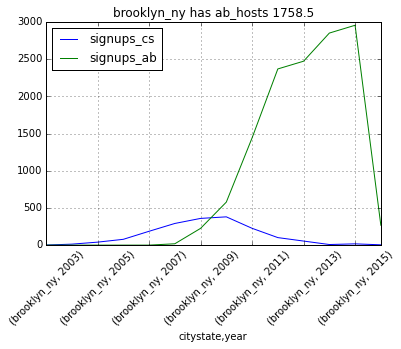

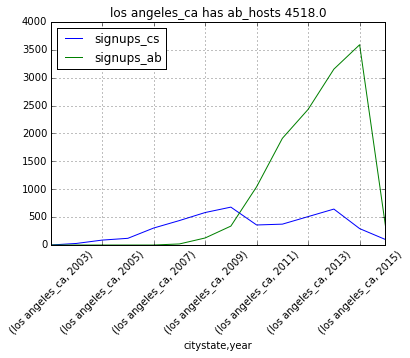

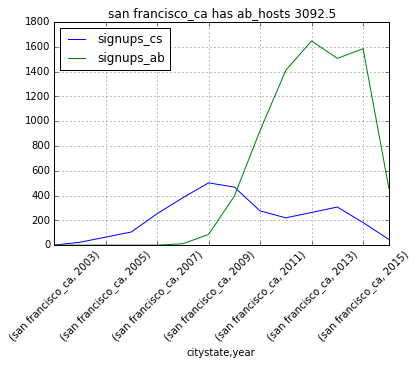

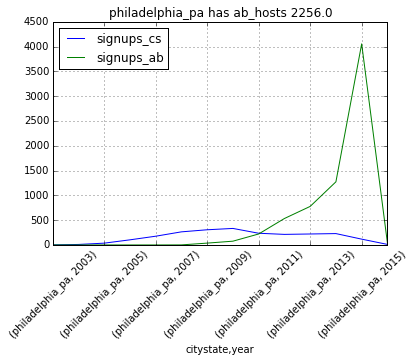

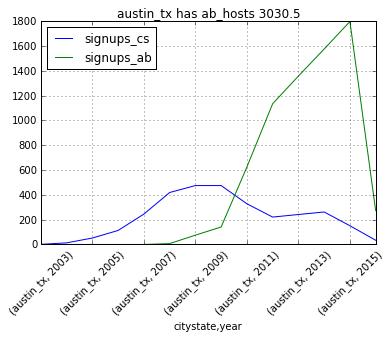

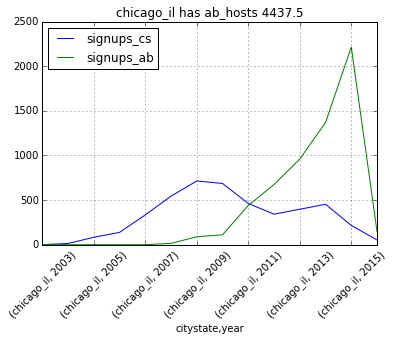

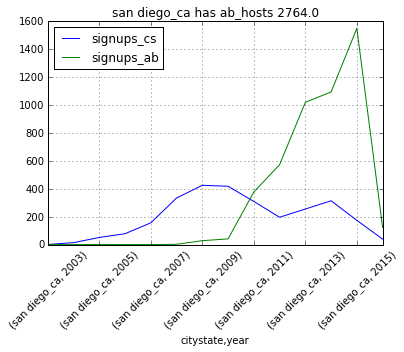

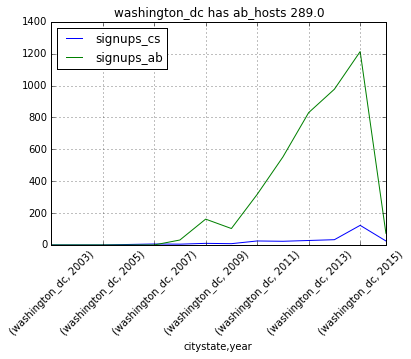

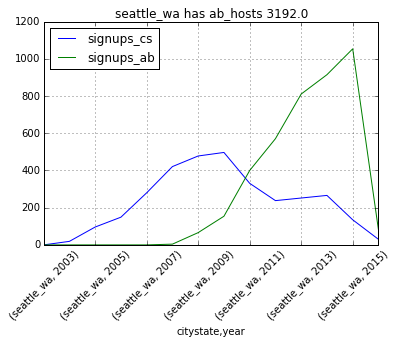

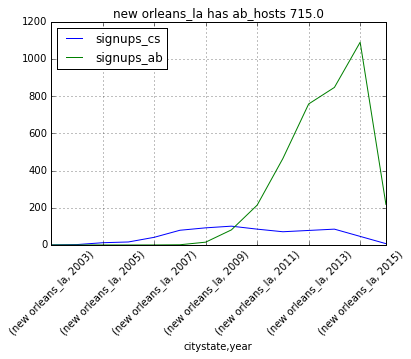

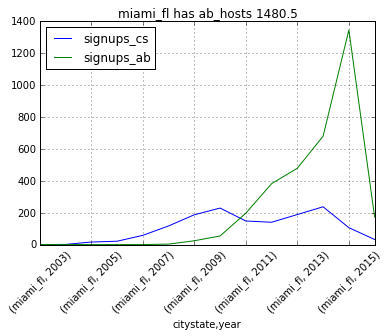

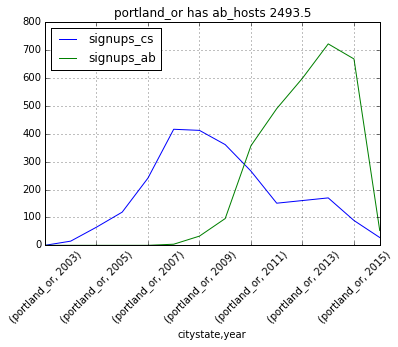

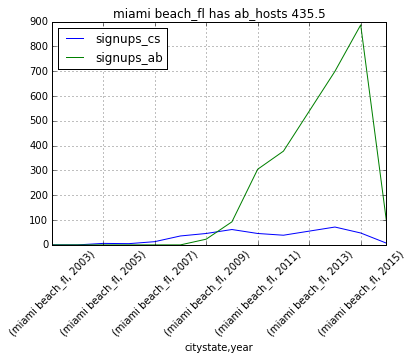

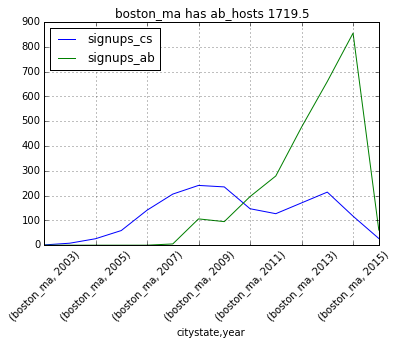

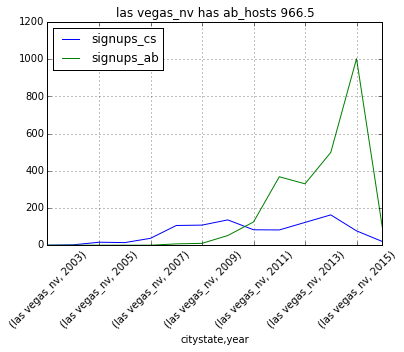

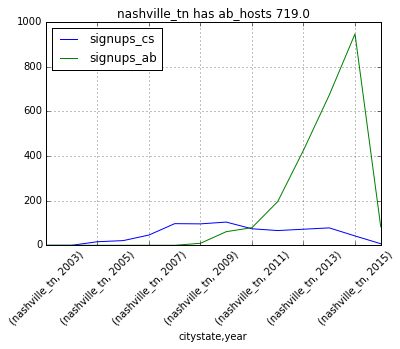

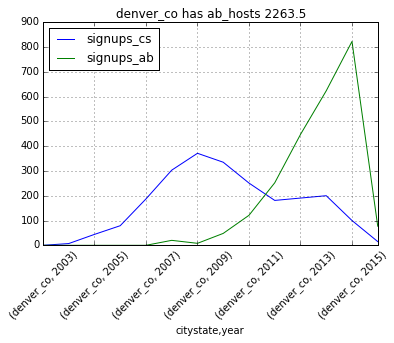

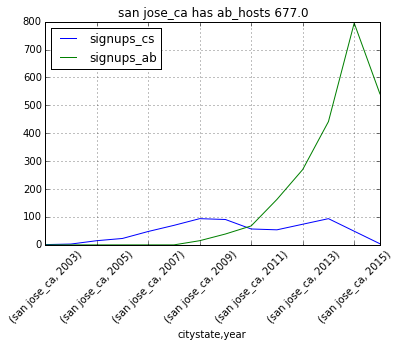

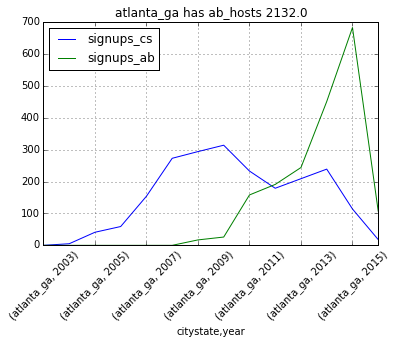

In [84]:
big_cities_groups = big_cities_2013mean.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Big Cities, with 1 References Verification Cutoff

# Top and Bottom 10 Cities by Host Signup Correlation
cherry hill_nj -1.0
pittsburg_ks -1.0
batavia_il -1.0
nutley_nj -1.0
leland_nc -1.0
leeds_me -1.0
leeds_ma -1.0
lee_me -1.0
lebanon_pa -1.0
lebanon_or -1.0
lebanon_in -1.0
leawood_ks -1.0
leavenworth_ks -1.0
le roy_ny -1.0
lawton_mi -1.0
vidalia_ga nan
view park-windsor hills_ca nan
warrenton_or nan
west harrison_in nan
west windsor township_nj nan
westfield_ma nan
westwego_la nan
whitewater_wi nan
williamsville_ny nan
windsor heights_ia nan
winthrop_me nan
woodbridge township_nj nan
yosemite valley_ca nan
young harris_ga nan
zephyrhills_fl nan
# Top and Bottom 10 Cities by AB size
new york_ny 6372.5
brooklyn_ny 1758.5
los angeles_ca 4518.0
san francisco_ca 3092.5
philadelphia_pa 2256.0
austin_tx 3030.5
chicago_il 4437.5
san diego_ca 2764.0
washington_dc 289.0
seattle_wa 3192.0
new orleans_la 715.0
miami_fl 1480.5
portland_or 2493.5
miami beach_fl 435.5
boston_ma 1719.5
las vegas_nv 966.5
nashville_tn 719.0
denver_co 2263.5
san jose

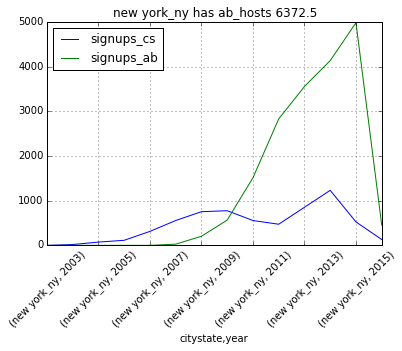

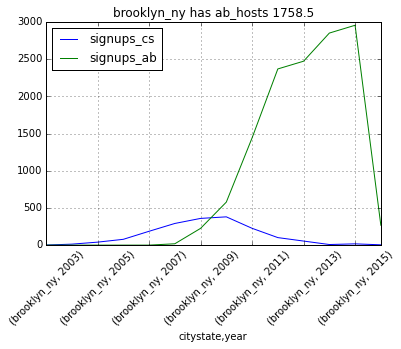

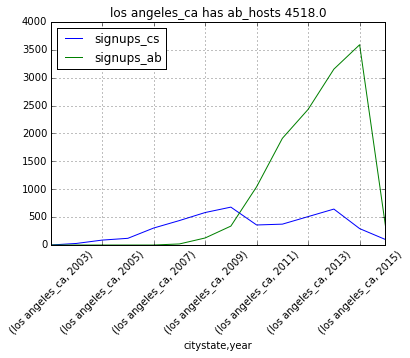

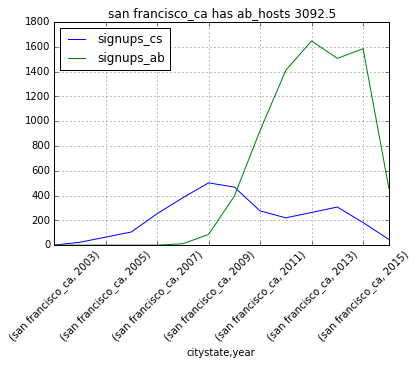

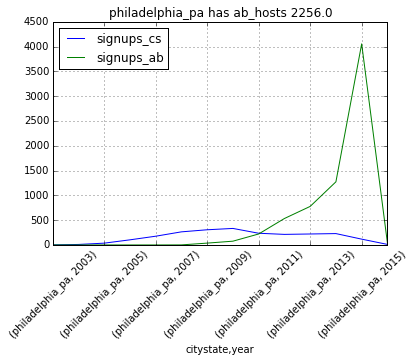

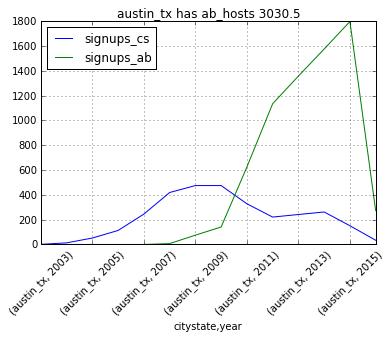

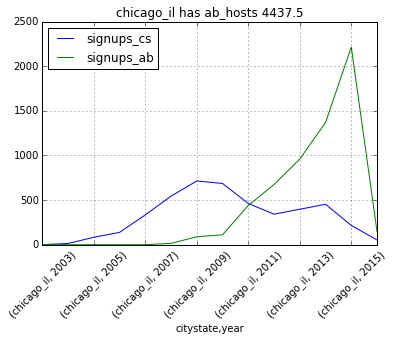

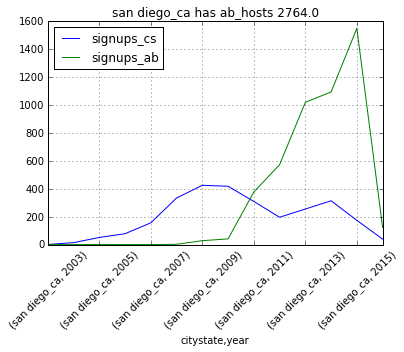

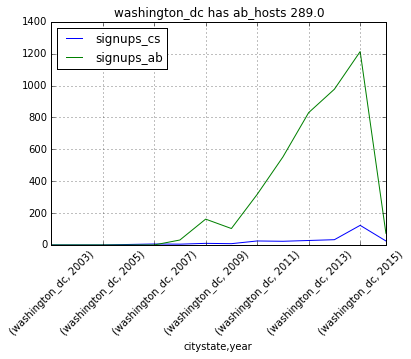

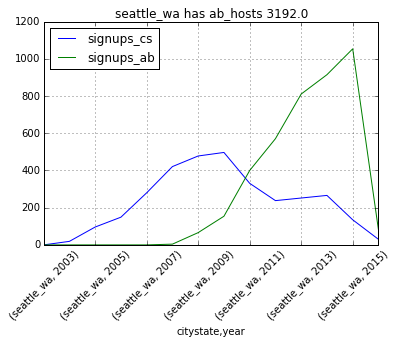

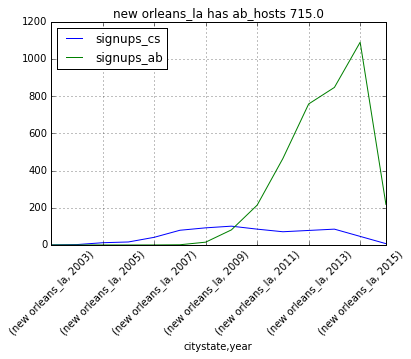

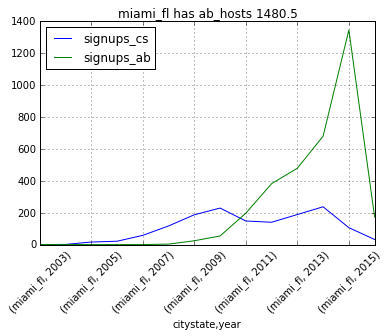

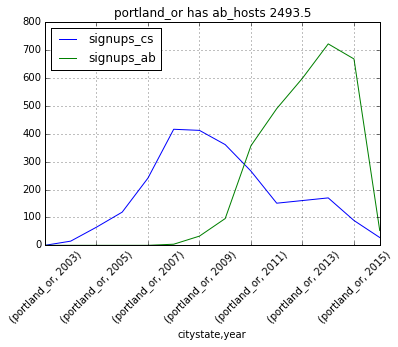

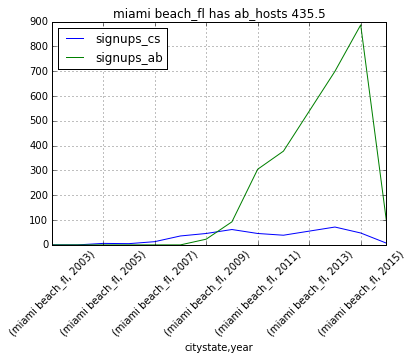

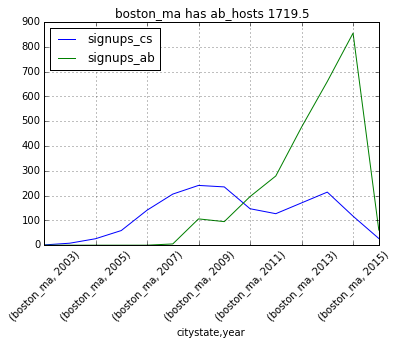

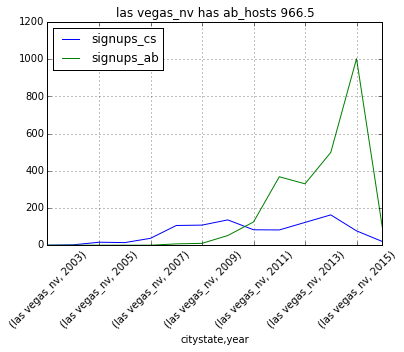

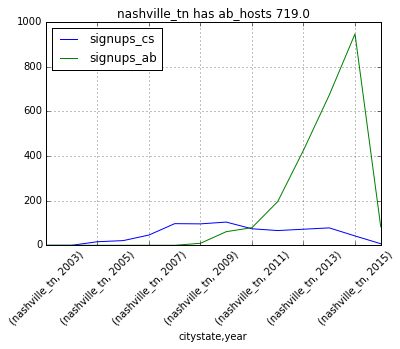

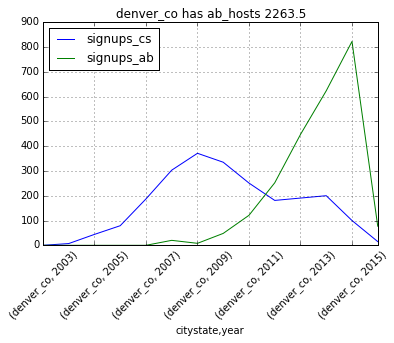

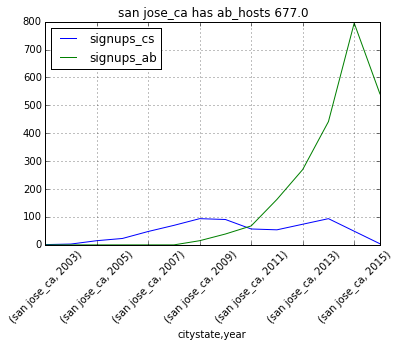

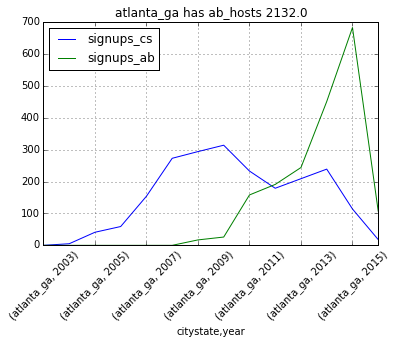

In [85]:
big_cities_groups_refver = big_cities_refver.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups_refver.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize_refver = big_cities_groups_refver.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Load Census Data

In [86]:
census_income = pandas.read_csv('geographic/nhgis0005_csv/nhgis0005_ds206_20145_2014_place.csv',encoding = "ISO-8859-1",usecols=['STATE','PLACE','ABDPE001','GISJOIN'])
census_income.columns = ['gisjoin', 'state', 'place', 'income']

census_pop = pandas.read_csv('geographic/nhgis0006_csv/nhgis0006_ds206_20145_2014_place.csv', encoding = "ISO-8859-1", usecols=['STATE','PLACE','ABA1E001','GISJOIN'])
census_pop.columns = ['gisjoin','state','place','pop']

popinc = pandas.merge(census_income, census_pop[['gisjoin','pop']], left_on='gisjoin', right_on='gisjoin')

In [87]:
popinc.head()

gisjoin    state            place  income   pop
0  G01000100  Alabama       Abanda CDP   27989    43
1  G01000124  Alabama   Abbeville city   27989  2654
2  G01000460  Alabama  Adamsville city   46005  4472
3  G01000484  Alabama     Addison town   38194   913
4  G01000676  Alabama       Akron town   22813   302

In [88]:
%%capture
popinc['state_abbr'] = popinc['state'].apply(state_lookup)

In [89]:
census_abcs_map = {'Athens-Clarke County unified government (balance)': 'athens',
               'Augusta-Richmond County consolidated government (balance)':'augusta',
               'Boise City city':'boise',
               'East Honolulu CDP':'honolulu',
               'Indianapolis city (balance)':'indianapolis',
               'Lexington-Fayette urban county':'lexington',
               'Louisville/Jefferson County metro government (balance)':'louisville',
               'Nashville-Davidson metropolitan government (balance)':'nashville',
               'St. Augustine city': 'saint augustine',
               'St. Louis city':'saint louis',
               'St. Paul city':'saint paul',
               'St. Petersburg city':'saint petersburg',
               'San Buenaventura (Ventura) city':'ventura',
               'Kailua CDP (Hawaii County)':'kailua-kona',
                'South Lake Tahoe city':'south lake tahoe',
                'Kailua CDP (Honolulu County)':'kailua',
                  'El Paso de Robles (Paso Robles) city':'paso robles',
                  'St. Louis city': 'st. louis',
                  'Yosemite Lakes CDP':'yosemite national park',
                  'Barnstable Town city':'barnstable',
                  'Carmel Valley Village CDP':'carmel',
                  'Sunnyside-Tahoe City CDP':'tahoe city'}

missing_data = {'brooklyn_ny':{'pop':2504700,'income':46085},
               'queens_ny':{'pop':2230722,'income':57001},
               'venice_ca':{'pop':40605,'income':67909},
                'bronx_ny':{'pop':1385108,'income':34388},
                'astoria_ny':{'pop':154000,'income':57001},
                'staten island_ny':{'pop':468730,'income':72569},
                'weehawken_nj':{'pop':634266,'income':58442},
                'long island city_ny':{'pop':68117,'income':57001},
                'olympic valley_ca':{'pop':348432,'income':72725},
                'la jolla_ca':{'pop':42017,'income':72962},
               'wellfleet_ma':{'pop':2750,'income':43558},
                'killington_vt':{'pop':811,'income':47500}}

def norm_place(s):
    try:
        return census_abcs_map[s]
    except KeyError:
        end = s.split(" ")[-1]
        if end in ['city','CDP','town','village', 'borough', 'municipality']:
            snorm = ' '.join(s.split(' ')[:-1])
            return snorm.lower()
        else:
            return s

In [90]:
popinc['place_norm'] = popinc['place'].apply(norm_place)

In [91]:
popinc['citystate'] = popinc['place_norm'] + '_' + popinc['state_abbr']

In [92]:
popinc = popinc[['citystate', 'pop','income']]

In [93]:
popinc.head()

citystate   pop  income
0      abanda_al    43   27989
1   abbeville_al  2654   27989
2  adamsville_al  4472   46005
3     addison_al   913   38194
4       akron_al   302   22813

In [94]:
popinc_missing = pandas.DataFrame.from_dict(missing_data,orient='index')

In [95]:
popinc_missing['citystate'] = popinc_missing.index

In [96]:
len(popinc.dropna())

28512

In [97]:
popinc_clean = popinc.dropna()
popinc_combined = popinc_clean.append(popinc_missing, ignore_index=True)

In [98]:
abcs_census_corr = pandas.merge(big_cities_corr_refver,popinc_combined, how='inner', left_index=True, right_on='citystate')

In [99]:
#these are the missing ones
missing = list(big_cities_corr_refver.index - abcs_census_corr['citystate'])

In [100]:
#small_census_df = census_df[['ABDPE001','citystate']]
#small_census_df.columns = ['income','citystate']
#small_census_df.to_csv('census_income.csv')

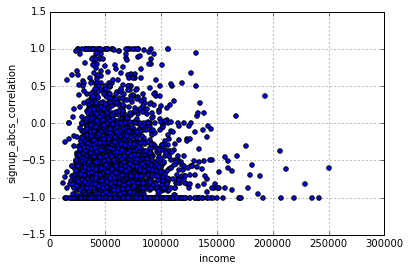

In [101]:
abcs_census_corr.plot(y= 'signup_abcs_correlation', x='income', kind='scatter')

In [102]:
#pandas.stats.ols.OLS(abcs_census['income'], abcs_census['signup_abcs_correlation'])

NameError: name 'abcs_census' is not defined

In [103]:
big_cities_size = big_cities_groups_refver.agg(sum)

In [104]:
abcs_census_size = pandas.merge(big_cities_size,popinc_combined, how='inner', left_index=True, right_on='citystate')

In [105]:
missing_cities = list(set(big_cities_size.index) - set(abcs_census_size['citystate']))

In [106]:
missing_cities_df = big_cities_size.ix[missing_cities].sort('signups_ab', ascending=False)
missing_cities_top = missing_cities_df[:20]
missing_cities_top_size = missing_cities_top.sum().sum()
print(missing_cities_top_size)

1657.0


In [107]:
missing_cities_top

signups_cs  signups_ab
citystate                                  
saint louis_mo              251         174
north hollywood_ca           23          71
north bergen_nj               3          69
princeton_nj                 25          68
eastsound_wa                  5          68
waimea_hi                     1          67
santa rosa beach_fl           5          65
eastham_ma                    2          63
watertown_ma                  7          62
amherst_ma                   55          59
st petersburg_fl             11          57
warren_vt                     1          57
carmel valley_ca              1          51
harwich_ma                    1          50
narragansett_ri               5          48
homewood_ca                   1          47
flushing_ny                   5          47
yarmouth_ma                   1          44
bushkill_pa                   1          43
saint pete beach_fl           1          42

In [108]:
print('number of hosts in abcs merged dataset')
bcs=big_cities_size.sum().sum()
print(bcs)
print('number of hosts that dont have income data after merging with census')
bccs = abcs_census_size[['signups_cs','signups_ab']].fillna(0).sum().sum()
print(bcs - bccs)
print('as a percent')
print(bccs/bcs)
print('top missing cities contribute')
print(missing_cities_top_size)

number of hosts in abcs merged dataset
248960.0
number of hosts that dont have income data after merging with census
6869.0
as a percent
0.972409222365
top missing cities contribute
1657.0


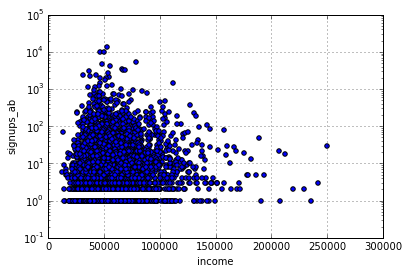

In [109]:
abcs_census_size.plot(x='income', y='signups_ab', kind='scatter')
plt.yscale('log')

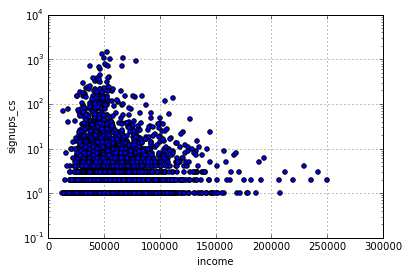

In [110]:
abcs_census_size.plot(x='income', y='signups_cs', kind='scatter')
plt.yscale('log')

In [133]:
abcs_census_size['ratio'] = abcs_census_size['signups_cs'] / abcs_census_size['signups_ab']
abcs_census_size['interaction'] = abcs_census_size['signups_ab'] * abcs_census_size['income']

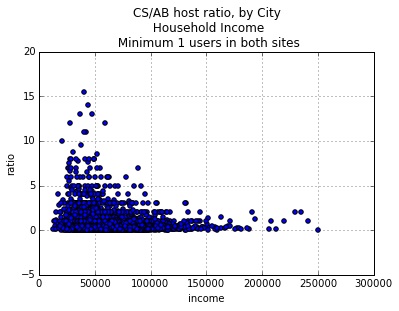

In [112]:
abcs_census_size.plot(x='income', y='ratio', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

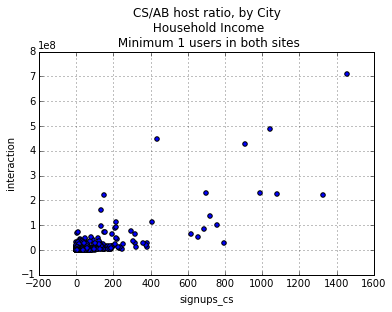

In [134]:
abcs_census_size.plot(x='signups_cs', y='interaction', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

In [136]:
median_income = abcs_census_size['income'].median()

In [137]:
median_income

50763.0

In [138]:
abcs_census_size['high_inc'] = abcs_census_size['income'].apply(lambda x: x > median_income)

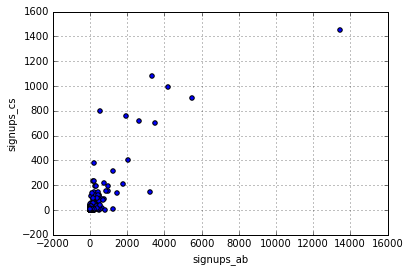

In [139]:
abcs_census_size[abcs_census_size['high_inc']==True].plot(x='signups_ab',y='signups_cs',kind='scatter')

In [113]:
abcs_census_size.head()

signups_cs  signups_ab     citystate  income     pop      ratio
10031           1           2  abbeville_la   28939   12341   0.500000
17561           3           9   aberdeen_nc   38721    6702   0.333333
23122          13           1   aberdeen_sd   47540   26979  13.000000
26568           2           5   aberdeen_wa   39735   16544   0.400000
23918          14           6    abilene_tx   42766  120776   2.333333

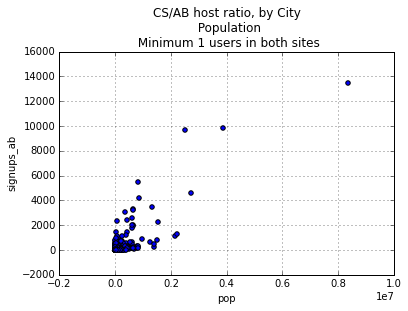

In [114]:
abcs_census_size.plot(x='pop', y='signups_ab', kind='scatter', title='CS/AB host ratio, by City \n Population \n Minimum {} users in both sites'.format(dual_min_refver))

In [115]:
pandas.stats.ols.OLS(abcs_census_size['ratio'], abcs_census_size['income'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3894
Number of Degrees of Freedom:   2

R-squared:         0.0145
Adj R-squared:     0.0143

Rmse:              1.1673

F-stat (1, 3892):    57.4347, p-value:     0.0000

Degrees of Freedom: model 1, resid 3892

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0000     0.0000      -7.58     0.0000    -0.0000    -0.0000
     intercept     1.1626     0.0458      25.36     0.0000     1.0727     1.2524
---------------------------------End of Summary---------------------------------

# Mutliple Linear Regression Mixed Effects

In [116]:
abcs_citystate_refver_flat = abcs_citystate_refver.reset_index()

In [119]:
abcs_citystate_refver_flat = abcs_citystate_refver_flat[(abcs_citystate_refver_flat['year']>=2008) & (abcs_citystate_refver_flat['year']<=2015)]

In [120]:
abcs_popinc = pandas.merge(abcs_citystate_refver_flat, popinc_combined, how='inner', left_on='citystate', right_on='citystate')

In [121]:
%load_ext rpy2.ipython

In [122]:
%Rpush abcs_popinc

In [127]:
%%R
library(lme4)
library(lmerTest)

/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lmerTest’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lme4’:

    lmer


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:stats’:

    step


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [130]:
%%R


#thoughts, pop a random effect? can it be if it's continuous
#compare signs per pop instead?
#try interactions signs*pop, signs*income
#try randome slopes too 1+ab|citystat 1+ab|year
#consider rescaling
crowd.model = lmer(signups_cs ~ signups_ab + pop + (1|citystate) + year, data=abcs_popinc, REML=FALSE)
crowd.null = lmer(signups_cs ~ pop + (1|citystate) + year, data=abcs_popinc, REML=FALSE)

print(summary(crowd.model))
print(anova(crowd.null, crowd.model))

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: signups_cs ~ signups_ab + pop + (1 | citystate) + year
   Data: abcs_popinc

     AIC      BIC   logLik deviance df.resid 
137697.5 137746.5 -68842.8 137685.5    25919 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-30.4527  -0.1538  -0.0143   0.1034  30.5281 

Random effects:
 Groups    Name        Variance Std.Dev.
 citystate (Intercept) 10.36    3.219   
 Residual               7.14    2.672   
Number of obs: 25925, groups:  citystate, 8831

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  5.172e+02  1.731e+01  2.228e+04   29.88   <2e-16 ***
signups_ab  -1.639e-02  4.155e-04  2.116e+04  -39.45   <2e-16 ***
pop          2.957e-05  2.943e-07  9.537e+03  100.49   <2e-16 ***
year        -2.568e-01  8.603e-03  2.228e+04  -29.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

In [132]:
%%R
abcs_popinc['inclevel'] = 

crowd.model = lmer(signups_cs ~  income*signups_ab + pop + (1|citystate) + year, data=abcs_popinc, REML=FALSE)
crowd.null = lmer(signups_cs ~ + pop + (1|citystate) + year, data=abcs_popinc, REML=FALSE)

print(summary(crowd.model))
print(anova(crowd.null, crowd.model))

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: signups_cs ~ income * signups_ab + pop + (1 | citystate) + year
   Data: abcs_popinc

     AIC      BIC   logLik deviance df.resid 
137640.3 137705.6 -68812.1 137624.3    25917 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-30.3963  -0.1555  -0.0145   0.1040  30.4291 

Random effects:
 Groups    Name        Variance Std.Dev.
 citystate (Intercept) 10.237   3.200   
 Residual               7.147   2.673   
Number of obs: 25925, groups:  citystate, 8831

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.238e+02  1.733e+01  2.230e+04  30.220  < 2e-16 ***
income            -5.090e-06  1.526e-06  1.176e+04  -3.335 0.000854 ***
signups_ab        -3.073e-02  2.000e-03  2.302e+04 -15.365  < 2e-16 ***
pop                2.960e-05  2.928e-07  9.485e+03 101.083  < 2e-16 ***
year              

In [125]:
%%R
crowd.model = lmer(signups_cs ~ signups_ab*pop + income + (1|citystate) + (1|year), data=abcs_popinc, REML=FALSE)
crowd.null = lmer(signups_cs ~ + income + (1|citystate) + (1|year), data=abcs_popinc, REML=FALSE)

print(summary(crowd.model))
print(anova(crowd.null, crowd.model))

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: signups_cs ~ signups_ab * pop + income + (1 | citystate) + (1 |  
    year)
   Data: abcs_popinc

     AIC      BIC   logLik deviance df.resid 
136003.2 136068.5 -67993.6 135987.2    25917 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-20.0668  -0.1434  -0.0188   0.0973  22.9043 

Random effects:
 Groups    Name        Variance Std.Dev.
 citystate (Intercept) 12.3089  3.5084  
 year      (Intercept)  0.2357  0.4855  
 Residual               6.1384  2.4776  
Number of obs: 25925, groups:  citystate, 8831; year, 8

Fixed effects:
                 Estimate Std. Error t value
(Intercept)     8.368e-01  1.975e-01    4.24
signups_ab     -3.827e-02  6.076e-04  -62.98
pop             2.836e-05  3.150e-07   90.03
income         -3.831e-06  1.604e-06   -2.39
signups_ab:pop  5.319e-09  1.188e-10   44.76

Correlation of Fixed Effects:
            (Intr) sgnps_ pop    income
signups_ab   0.003                   

In [ ]:
%%R
#crowd.model = lmer(signups_cs ~ signups_ab +(1+signups_ab|pop) + (1+signups_ab|citystate) + (1|year), data=abcs_popinc, REML=FALSE)
#crowd.null = lmer(signups_cs ~  (1+signups_ab|pop) + (1+signups_ab|citystate) + (1|year), data=abcs_popinc, REML=FALSE)

print(summary(crowd.model))
print(anova(crowd.null, crowd.model))

In [ ]:
%%R
abcs_popinc['cs_signup_per'] = (abcs_popinc['signups_cs'] / abcs_popinc['pop']) * 1000000
abcs_popinc['ab_signup_per'] = (abcs_popinc['signups_ab'] / abcs_popinc['pop']) * 1000000

crowd.model = lmer(cs_signup_per ~ ab_signup_per + (1+ab_signup_per|citystate) , data=abcs_popinc, REML=FALSE)
crowd.null = lmer(cs_signup_per ~  (1+ab_signup_per|citystate), data=abcs_popinc, REML=FALSE)

print(summary(crowd.model))
print(anova(crowd.null, crowd.model))

In [ ]:
%%R
coef(crowd.model)

# Cities to check for overlap
highest and lowest correlations, ratios, and income for harman and zhiyi

In [ ]:
corr_sorted = big_cities_corr_refver.sort('signup_abcs_correlation')
least_corr, most_corr = corr_sorted[:10], corr_sorted[-10:]
print(least_corr)
print(most_corr)

In [ ]:
sorted_ratio = abcs_census_size.sort('ratio')
least_ratio, most_ratio = sorted_ratio[:10], sorted_ratio[-10:]
print(least_ratio)
print(most_ratio)

In [ ]:
sorted_income = abcs_census_size.sort('income')
least_income, most_income = sorted_income[:10], sorted_income[-10:]
print(least_income)
print(most_income)

# mulitlisters, multicities

In [ ]:
ab_df.head()

In [ ]:
host_num_cities = ab_df[['host_id','smart_location']].groupby(by='host_id').agg({'host_id':len,
                                                                                 'smart_location':lambda x: len(set(x))})

In [ ]:
host_num_cities

In [ ]:
multi_city_hosts = host_num_cities[host_num_cities['smart_location'] > 1]

In [ ]:
multi_city_hosts.plot(kind='hist')
plt.yscale('log')

In [ ]:
multi_city_hosts.sort('smart_location',ascending=False).head()

In [ ]:
multilisters = host_num_cities[host_num_cities['host_id'] > 2]

In [ ]:
len(multilisters)/len(host_num_cities)

In [ ]:
len(multi_city_hosts)/len(multilisters)

# 58% of multilisters have listings in more than 1 city too